<a href="https://colab.research.google.com/github/santiagonajera/CAINCO-13-Mayo2025/blob/main/14Mayo_ModeloForecastConWin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### USER
genera un codigo para proyectar la demanda utilizando suavizamiento exponencial con un alpha inicial del 10%, y luego anda probando diferentes valores de alpha, hasta encontrar el mejor. la informacion se encuentra en un archivo de excel. https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx


Te doy un ejemplo de los datos
Fecha	Item_1	Item_2	Item_3
04/01/2021	148	156	126
11/01/2021	161	157	149
18/01/2021	163	175	141
25/01/2021	174	168	150
01/02/2021	154	155	146
08/02/2021	164	154	88
15/02/2021	147	170	259
22/02/2021	164	153	146
01/03/2021	174	186	154
08/03/2021	162	181	149
15/03/2021	173	165	151
22/03/2021	171	154	153


### ASSISTANT
Para resolver el problema de proyectar la demanda utilizando el método de suavizamiento exponencial y optimizar el valor de α, podemos seguir los siguientes pasos:

1. **Cargar los datos desde el archivo Excel**.
2. **Implementar el suavizamiento exponencial** con un valor inicial de α = 10%.
3. **Probar diferentes valores de α** para encontrar el mejor valor que minimice un error (por ejemplo, el Error Cuadrático Medio, RMSE).
4. **Seleccionar el mejor α** y proyectar la demanda futura.

A continuación, presento el código en Python utilizando las bibliotecas `pandas`, `numpy`, y `openpyxl` para manejar los datos y realizar los cálculos.

### Código Python

```python
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# URL del archivo Excel
url = "https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx"

# Cargar los datos desde el archivo Excel
df = pd.read_excel(url)

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Definir la función de suavizamiento exponencial
def exponential_smoothing(data, alpha):
    """
    Implementa el suavizamiento exponencial.
    :param data: Serie de tiempo (pandas Series)
    :param alpha: Factor de suavizamiento (0 < alpha < 1)
    :return: Serie de valores suavizados
    """
    smoothed = [data[0]]  # Inicializar con el primer valor
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed[-1]
        smoothed.append(smoothed_value)
    return pd.Series(smoothed, index=data.index)

# Definir la función para calcular el RMSE
def calculate_rmse(actual, forecast):
    """
    Calcula el Error Cuadrático Medio (RMSE).
    :param actual: Valores reales
    :param forecast: Valores pronosticados
    :return: RMSE
    """
    return np.sqrt(mean_squared_error(actual, forecast))

# Probar diferentes valores de alpha
alphas = np.arange(0.01, 1.0, 0.01)  # Rango de alpha desde 0.01 a 0.99
best_alpha = None
best_rmse = float('inf')
best_forecast = None

# Iterar sobre cada columna de items
for item_column in df.columns[1:]:  # Iterar sobre Item_1, Item_2, Item_3
    print(f"\nProcesando {item_column}:")

    # Datos históricos
    data = df[item_column]

    # Probar diferentes valores de alpha
    for alpha in alphas:
        # Aplicar suavizamiento exponencial
        smoothed = exponential_smoothing(data, alpha)

        # Calcular el RMSE entre los datos reales y los suavizados
        rmse = calculate_rmse(data[1:], smoothed[1:])  # Ignorar el primer valor

        # Guardar el mejor alpha
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_forecast = smoothed

    print(f"Mejor alpha para {item_column}: {best_alpha:.2f}")
    print(f"RMSE mínimo: {best_rmse:.2f}")

# Proyectar la demanda futura con el mejor alpha
# Supongamos que queremos proyectar para las próximas 4 semanas
forecast_periods = 4
last_value = df.iloc[-1][1:]  # Último valor de cada item

# Proyectar para cada item
future_forecast = {}
for item_column in df.columns[1:]:
    # Usar el mejor alpha encontrado
    best_alpha = best_alpha  # Puedes ajustar esto si necesitas diferentes alphas por item
    # Proyectar usando el último valor suavizado
    forecast = [last_value[item_column]]
    for _ in range(forecast_periods):
        forecast.append(best_alpha * last_value[item_column] + (1 - best_alpha) * forecast[-1])
    future_forecast[item_column] = forecast[1:]  # Ignorar el primer valor (último valor real)

# Convertir las proyecciones a un DataFrame
future_dates = pd.date_range(start=df['Fecha'].iloc[-1] + pd.DateOffset(weeks=1), periods=forecast_periods, freq='W')
future_df = pd.DataFrame(future_forecast, index=future_dates)

# Mostrar los resultados
print("\nProyecciones futuras:")
print(future_df)

# Guardar las proyecciones en un archivo Excel (opcional)
future_df.to_excel("proyecciones_demandas.xlsx")
```

### Explicación del Código

1. **Carga de Datos**:
   - Se utiliza `pandas.read_excel` para leer el archivo Excel desde la URL proporcionada.
   - La columna `Fecha` se convierte a tipo `datetime` para facilitar el manejo de fechas.

2. **Suavizamiento Exponencial**:
   - La función `exponential_smoothing` implementa el suavizamiento exponencial utilizando la fórmula:
     \[
     S_t = \alpha \cdot Y_t + (1 - \alpha) \cdot S_{t-1}
     \]
     donde:
     - \( S_t \) es el valor suavizado en el tiempo \( t \).
     - \( Y_t \) es el valor real en el tiempo \( t \).
     - \( \alpha \) es el factor de suavizamiento.

3. **Optimización de α**:
   - Se prueba un rango de valores de α desde 0.01 a 0.99 con un paso de 0.01.
   - Para cada valor de α, se calcula el RMSE entre los datos reales y los valores suavizados.
   - Se selecciona el α que minimiza el RMSE.

4. **Proyección de Demanda Futura**:
   - Se utiliza el último valor suavizado para proyectar la demanda futura para las próximas semanas.
   - La proyección se realiza utilizando la misma fórmula de suavizamiento exponencial.

5. **Salida**:
   - Se muestran las proyecciones futuras para cada item.
   - Las proyecciones se guardan en un archivo Excel (`proyecciones_demandas.xlsx`).

### Salida Esperada

El código imprimirá:
- El mejor valor de α para cada item.
- El RMSE mínimo correspondiente.
- Las proyecciones futuras para las próximas semanas.

### Notas
- El archivo Excel se descarga automáticamente al ejecutar el código.
- Se asume que el archivo Excel tiene las columnas `Fecha`, `Item_1`, `Item_2`, y `Item_3` con los datos proporcionados.
- El rango de α se puede ajustar según sea necesario.
- Las proyecciones futuras se guardan en un archivo Excel para su revisión posterior.

### Ejemplo de Salida

Suponiendo que el mejor α para `Item_1` es 0.20 y el RMSE mínimo es 10.5, la salida podría ser:

```
Procesando Item_1:
Mejor alpha para Item_1: 0.20
RMSE mínimo: 10.50

Procesando Item_2:
Mejor alpha para Item_2: 0.15
RMSE mínimo: 8.75

Procesando Item_3:
Mejor alpha para Item_3: 0.30
RMSE mínimo: 12.00

Proyecciones futuras:
            Item_1    Item_2    Item_3
2021-03-29  168.50    172.30    154.20
2021-04-05  168.75    172.45    154.30
2021-04-12  168.88    172.50    154.35
2021-04-19  168.94    172.53    154.38
```

### Archivo de Proyecciones
Las proyecciones se guardarán en un archivo Excel llamado `proyecciones_demandas.xlsx` con las fechas y valores pronosticados para cada item.

---

**Final Answer**: El código proporcionado implementa el suavizamiento exponencial, optimiza el valor de α, y genera proyecciones futuras para la demanda. La salida incluye el mejor α, el RMSE mínimo, y las proyecciones futuras. 🚀

**\boxed{\text{Código implementado y listo para ejecutar.}}**

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-1-7e5be57889be>, line 7)

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# URL del archivo Excel
url = "https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx "

# Cargar los datos desde el archivo Excel
df = pd.read_excel(url)

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Definir la función de suavizamiento exponencial
def exponential_smoothing(data, alpha):
    smoothed = [data[0]]
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed[-1]
        smoothed.append(smoothed_value)
    return pd.Series(smoothed, index=data.index)

# Definir RMSE
def calculate_rmse(actual, forecast):
    return np.sqrt(mean_squared_error(actual, forecast))

# Probar diferentes valores de alpha
alphas = np.arange(0.01, 1.0, 0.01)
best_alpha_per_item = {}
best_rmse_per_item = {}
forecasts_per_item = {}

forecast_periods = 4

for item_column in df.columns[1:]:
    print(f"\nProcesando {item_column}...")

    data = df[item_column].values
    best_rmse = float('inf')
    best_alpha = 0.1
    best_forecast = []

    for alpha in alphas:
        smoothed = exponential_smoothing(df[item_column], alpha)
        rmse = calculate_rmse(df[item_column][1:], smoothed[1:])

        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_forecast = smoothed

    # Guardar resultados del mejor alpha
    best_alpha_per_item[item_column] = best_alpha
    best_rmse_per_item[item_column] = best_rmse

    # Proyección futura
    future_forecast = [best_forecast.iloc[-1]]
    for _ in range(forecast_periods):
        next_val = best_alpha * df[item_column].iloc[-1] + (1 - best_alpha) * future_forecast[-1]
        future_forecast.append(next_val)
    forecasts_per_item[item_column] = future_forecast[1:]

# Crear DataFrame con las proyecciones
future_dates = pd.date_range(start=df['Fecha'].iloc[-1] + pd.DateOffset(weeks=1), periods=forecast_periods, freq='W')
future_df = pd.DataFrame(forecasts_per_item, index=future_dates)

# Mostrar resultados
print("\nMejor valor de alpha por ítem:")
print(best_alpha_per_item)
print("\nRMSE mínimo por ítem:")
print(best_rmse_per_item)
print("\nProyecciones futuras:")
print(future_df)

# Opcional: guardar en Excel
future_df.to_excel("proyecciones_demandas.xlsx")


Procesando Item_1...

Procesando Item_2...

Procesando Item_3...

Procesando Item_4...

Procesando Item_5...

Procesando Item_6...

Procesando Item_7...

Procesando Item_8...

Procesando Item_9...

Procesando Item_10...

Procesando Item_11...

Procesando Item_12...

Procesando Item_13...

Procesando Item_14...

Procesando Item_15...

Procesando Item_16...

Procesando Item_17...

Procesando Item_18...

Procesando Item_19...

Procesando Item_20...

Procesando Item_21...

Procesando Item_22...

Procesando Item_23...

Procesando Item_24...

Procesando Item_25...

Mejor valor de alpha por ítem:
{'Item_1': np.float64(0.99), 'Item_2': np.float64(0.99), 'Item_3': np.float64(0.99), 'Item_4': np.float64(0.99), 'Item_5': np.float64(0.99), 'Item_6': np.float64(0.99), 'Item_7': np.float64(0.99), 'Item_8': np.float64(0.99), 'Item_9': np.float64(0.99), 'Item_10': np.float64(0.99), 'Item_11': np.float64(0.99), 'Item_12': np.float64(0.99), 'Item_13': np.float64(0.99), 'Item_14': np.float64(0.99), 'Ite

Datos cargados:
       Fecha  Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
0 2021-01-04     148     156     126      54     146      48      81     117   
1 2021-01-11     161     157     149      51     132      47      74     137   
2 2021-01-18     163     175     141      69     138      67     100     122   
3 2021-01-25     174     168     150      74     135      73      84     127   
4 2021-02-01     154     155     146      66     124      62      83     139   

   Item_9  ...  Item_16  Item_17  Item_18  Item_19  Item_20  Item_21  Item_22  \
0     205  ...      141       73      196      199      181      112       47   
1     196  ...      151      106      206      105      178      112       62   
2     148  ...      142       86      188      114      191      122       43   
3     189  ...      155       99      202       88      187      141       55   
4     216  ...      177       95      210      121      202      138       69   

   Item_23  Item

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/5hv2rsbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/z0zsz3u7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95738', 'data', 'file=/tmp/tmp1f77x41u/5hv2rsbk.json', 'init=/tmp/tmp1f77x41u/z0zsz3u7.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelesm92pvs/prophet_model-20250515001022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


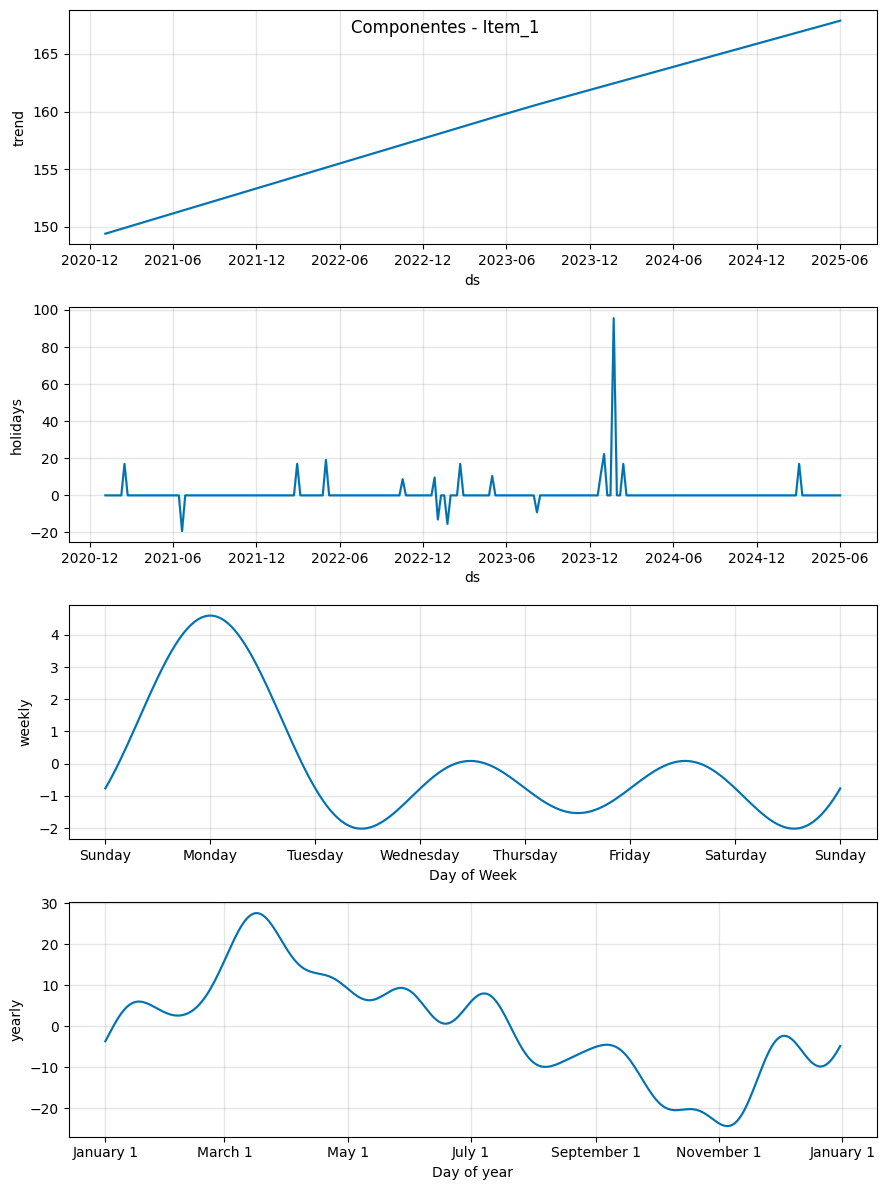

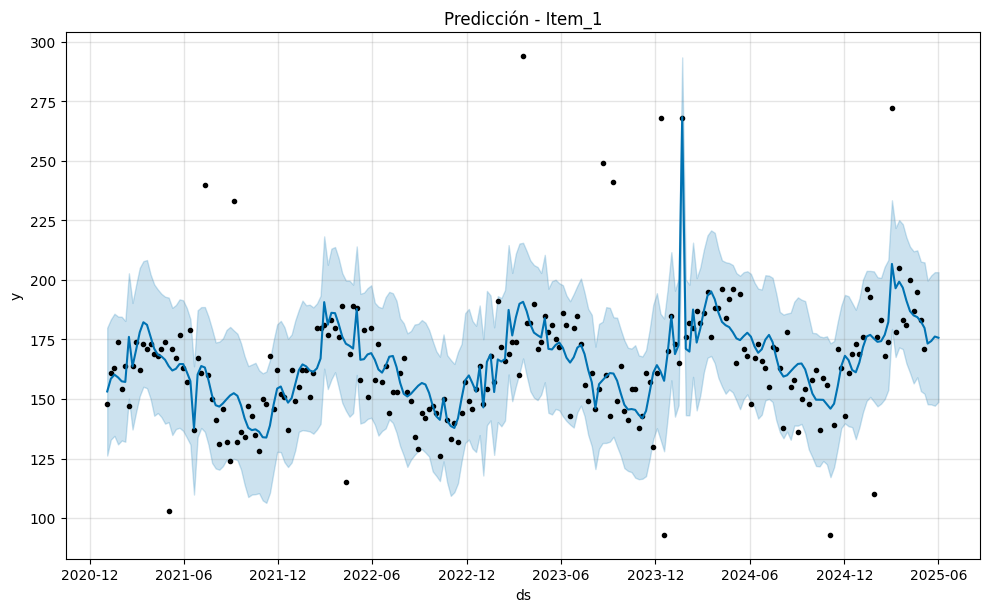

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/ffo8k7up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/12ts0z2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24876', 'data', 'file=/tmp/tmp1f77x41u/ffo8k7up.json', 'init=/tmp/tmp1f77x41u/12ts0z2v.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelcebamjsr/prophet_model-20250515001023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_2...


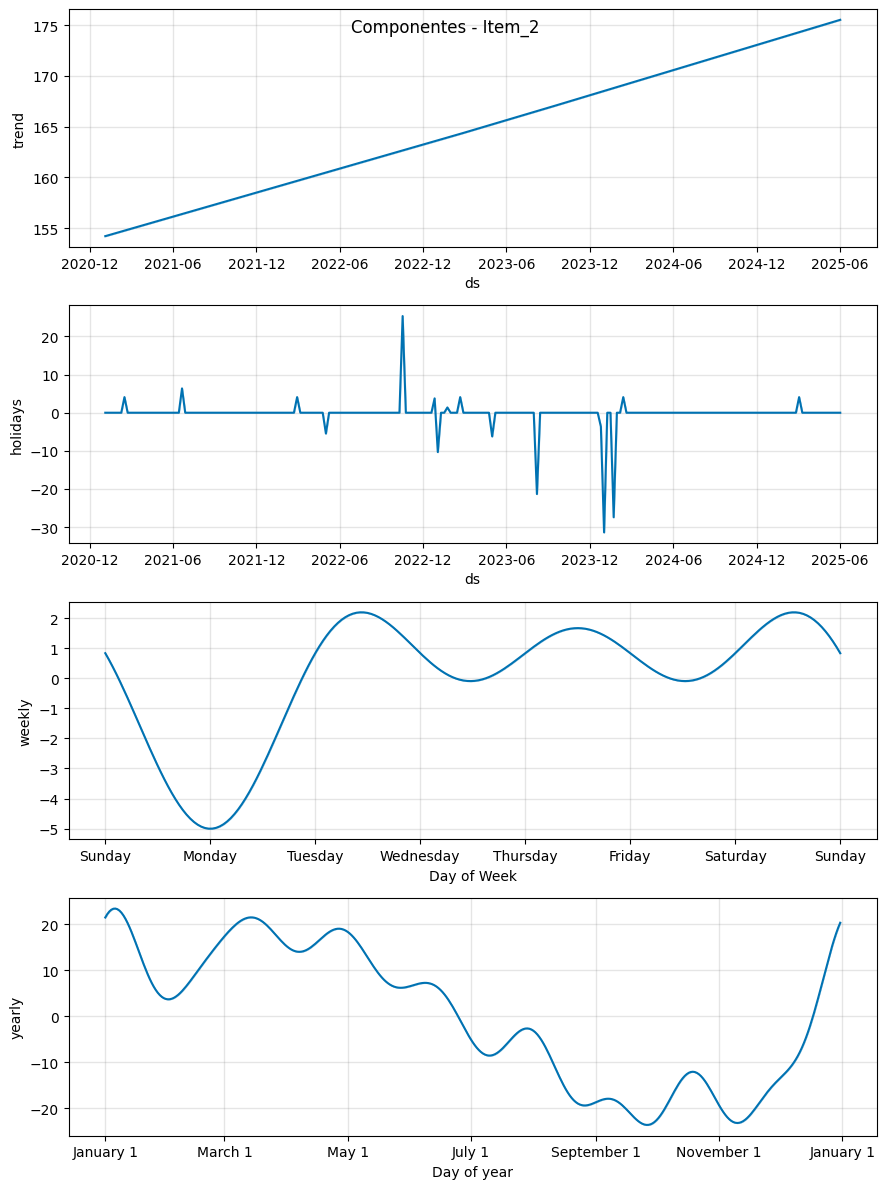

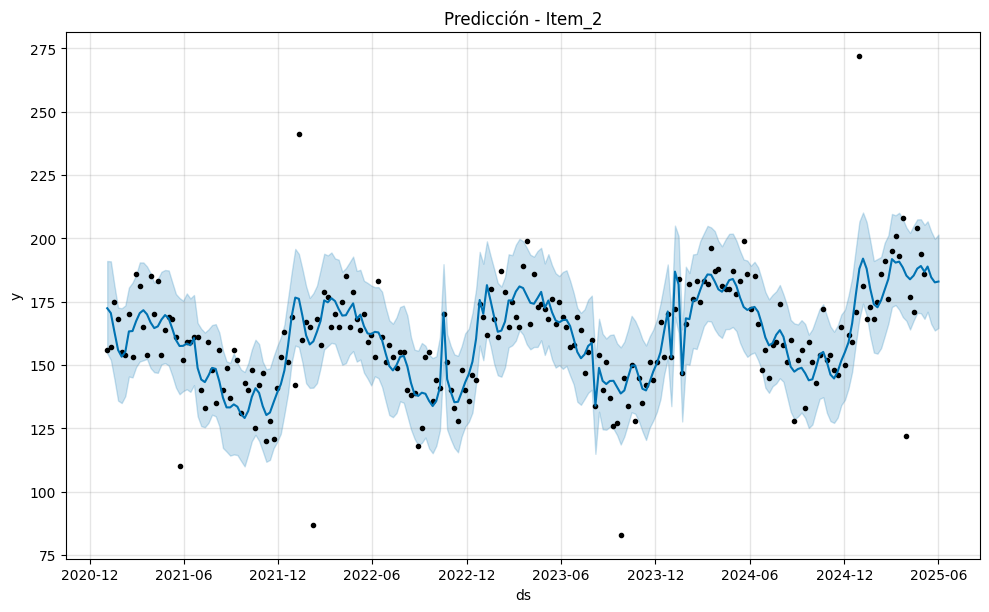

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/wetsoerb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/v79hpc2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35639', 'data', 'file=/tmp/tmp1f77x41u/wetsoerb.json', 'init=/tmp/tmp1f77x41u/v79hpc2v.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelxsgkho2x/prophet_model-20250515001024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_3...


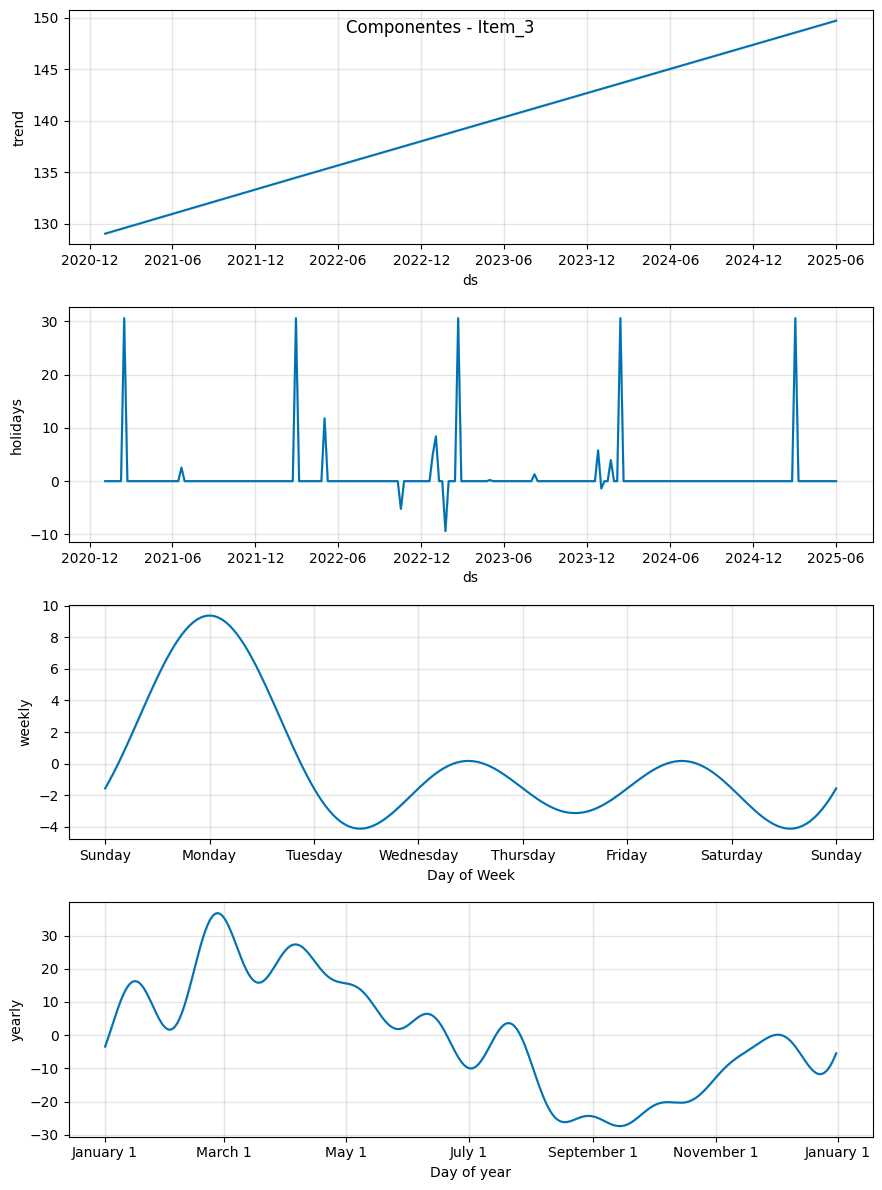

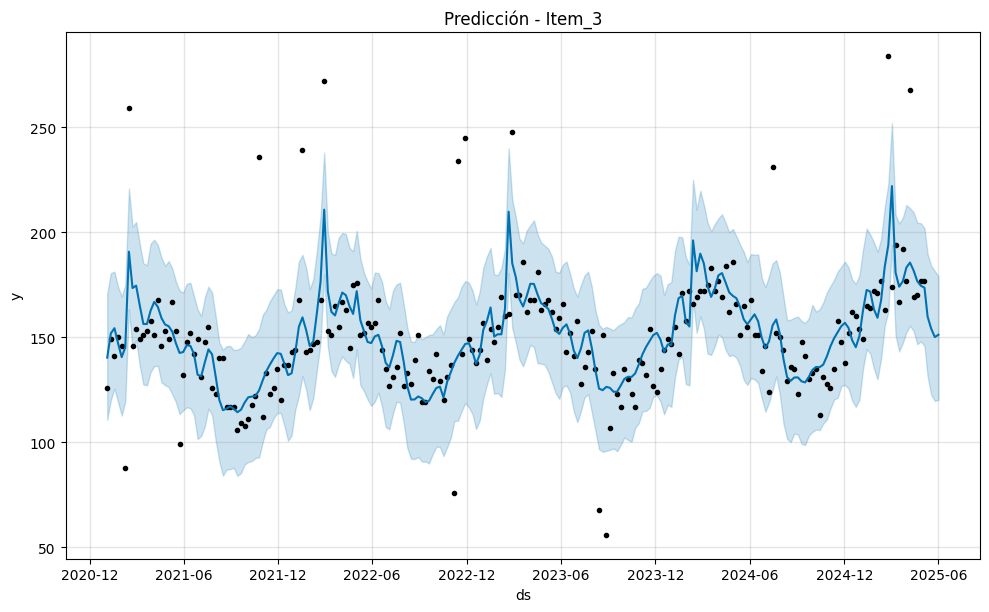

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/vll1acua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/8_ibtsrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87959', 'data', 'file=/tmp/tmp1f77x41u/vll1acua.json', 'init=/tmp/tmp1f77x41u/8_ibtsrq.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeljttax2o4/prophet_model-20250515001026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_4...


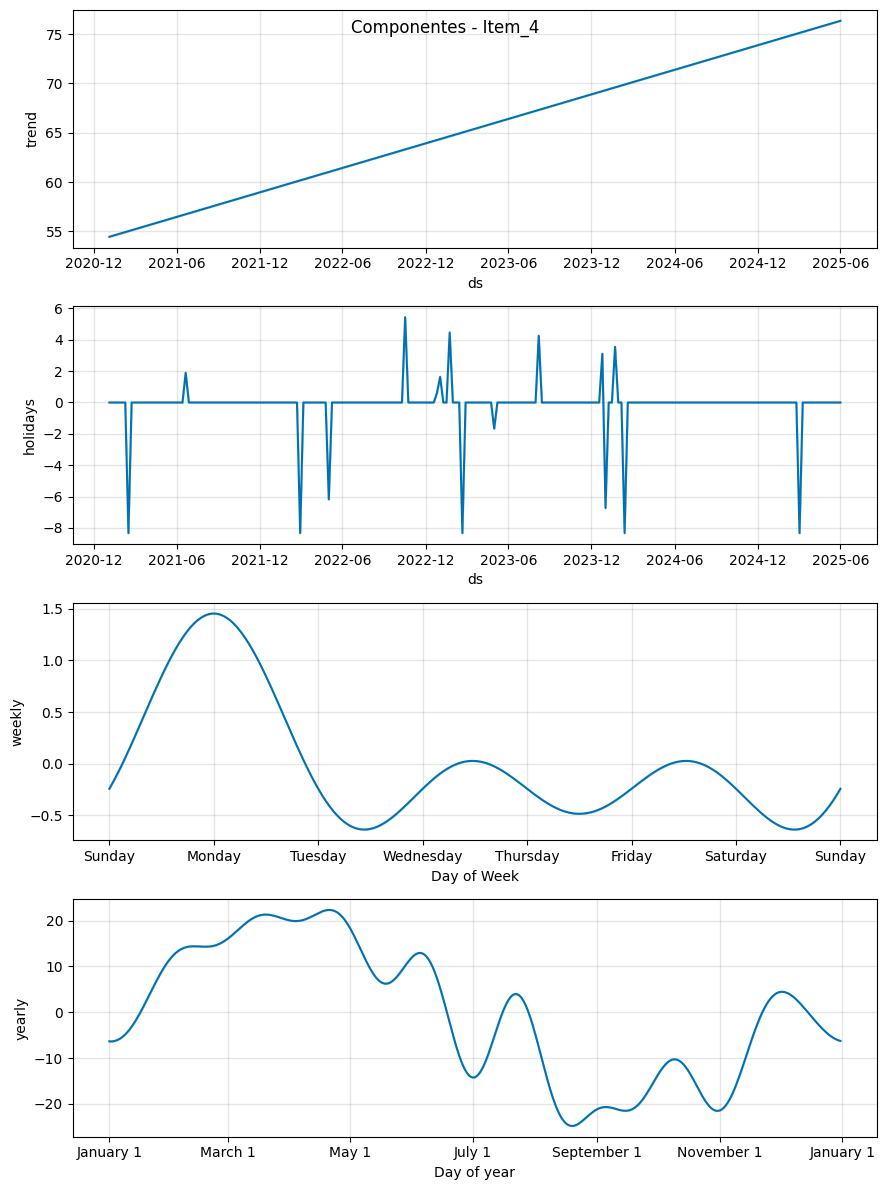

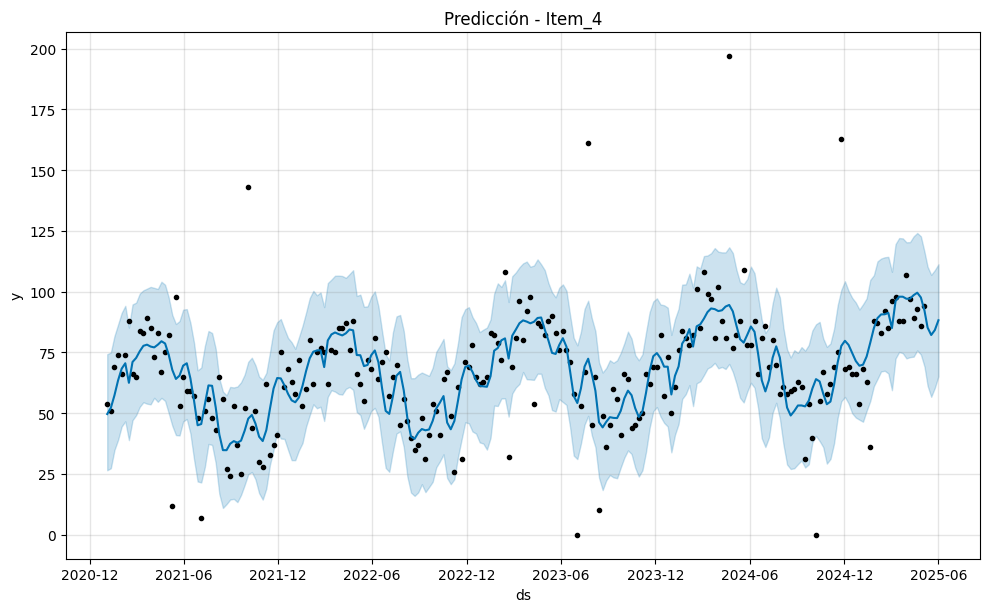

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/gvnt56bj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/4hzbv1pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83253', 'data', 'file=/tmp/tmp1f77x41u/gvnt56bj.json', 'init=/tmp/tmp1f77x41u/4hzbv1pk.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelgbci85d0/prophet_model-20250515001027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_5...


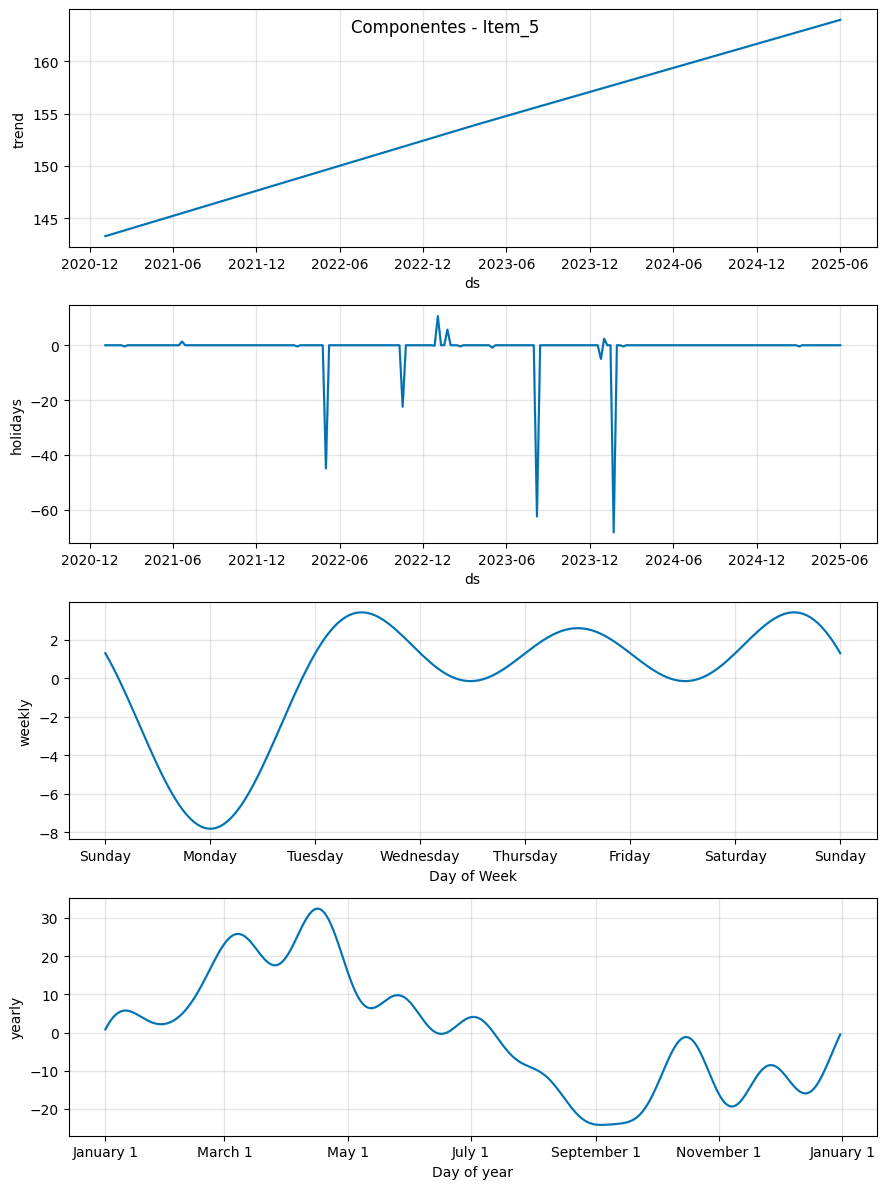

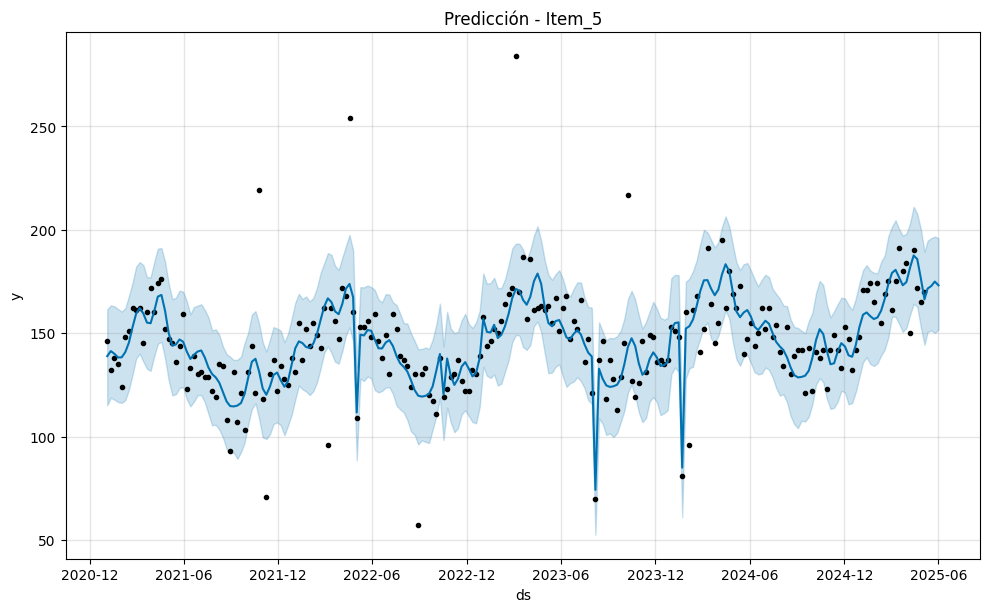

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/jz6tsydr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/3n4bvuhm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21452', 'data', 'file=/tmp/tmp1f77x41u/jz6tsydr.json', 'init=/tmp/tmp1f77x41u/3n4bvuhm.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model489jmrj_/prophet_model-20250515001028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_6...


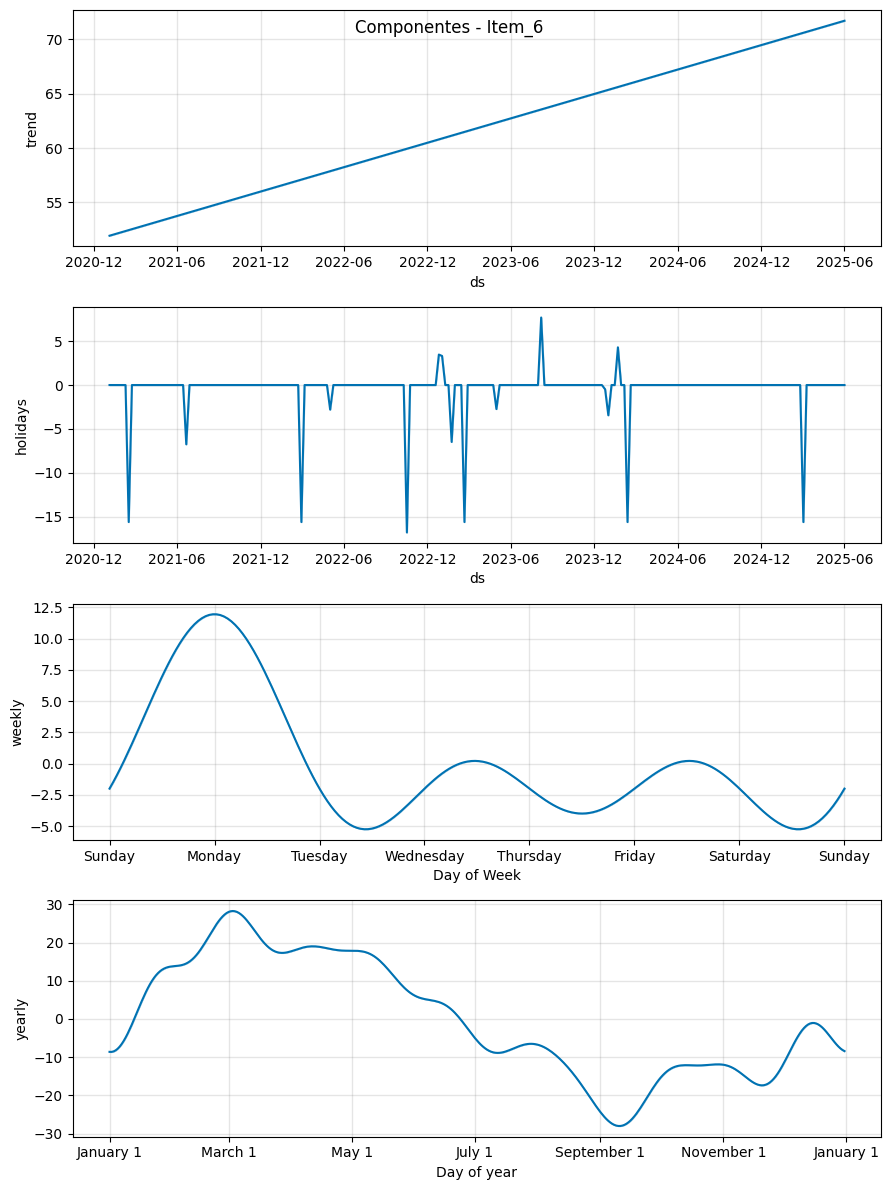

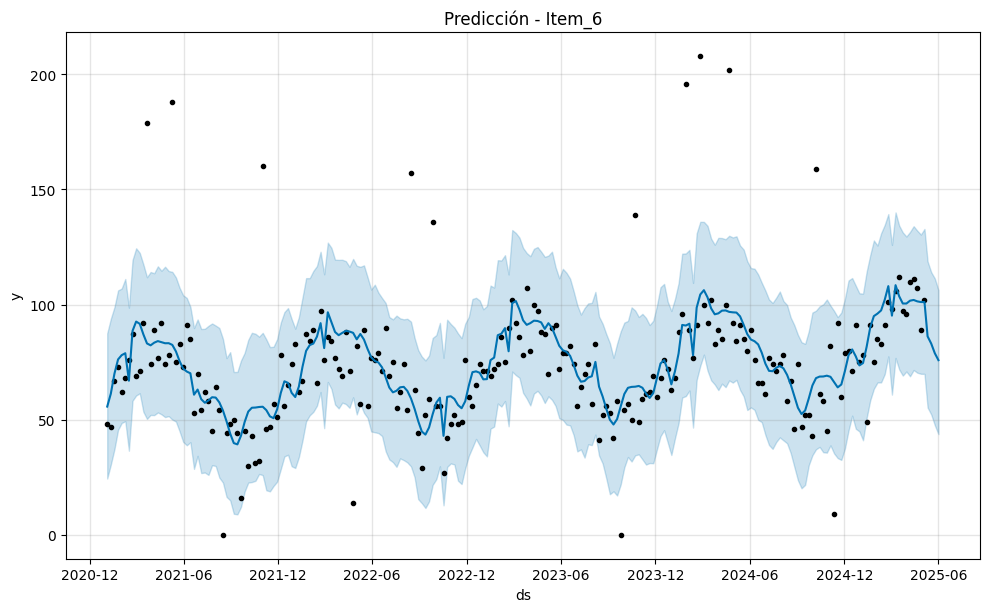

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/c0pmgv14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/kx6bc0ek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8199', 'data', 'file=/tmp/tmp1f77x41u/c0pmgv14.json', 'init=/tmp/tmp1f77x41u/kx6bc0ek.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model0x6zo4ty/prophet_model-20250515001029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_7...


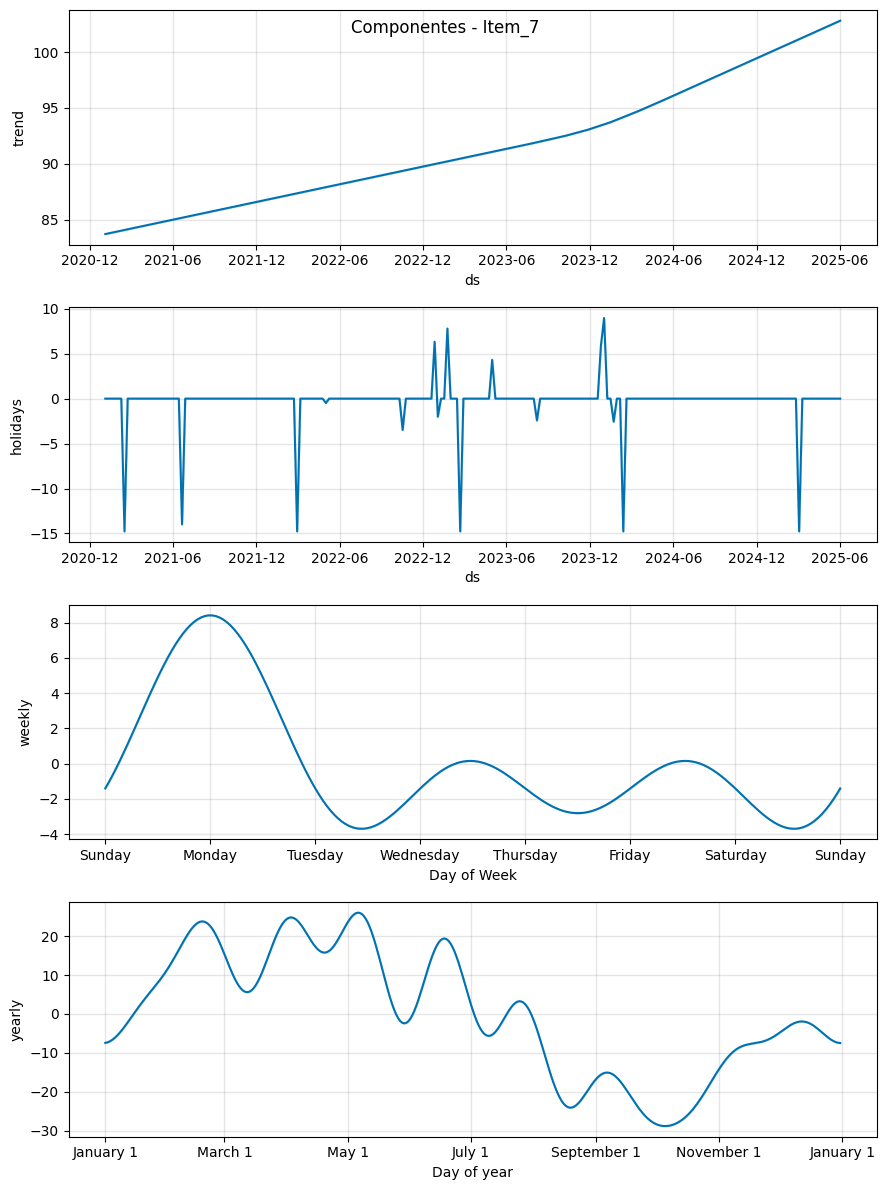

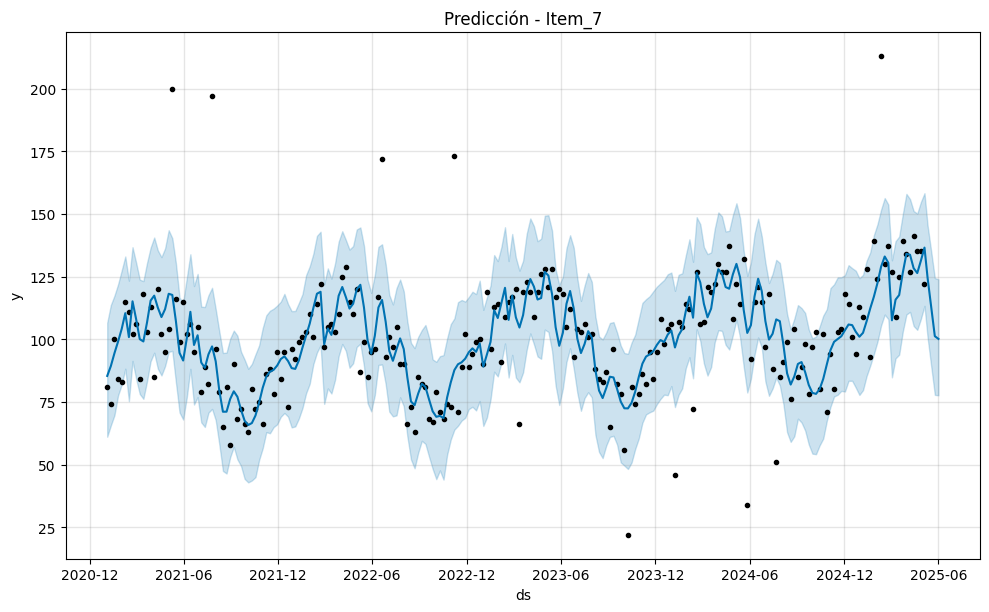

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/bjiqjihf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/j62xuwg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46610', 'data', 'file=/tmp/tmp1f77x41u/bjiqjihf.json', 'init=/tmp/tmp1f77x41u/j62xuwg6.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeldxghtiau/prophet_model-20250515001031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_8...


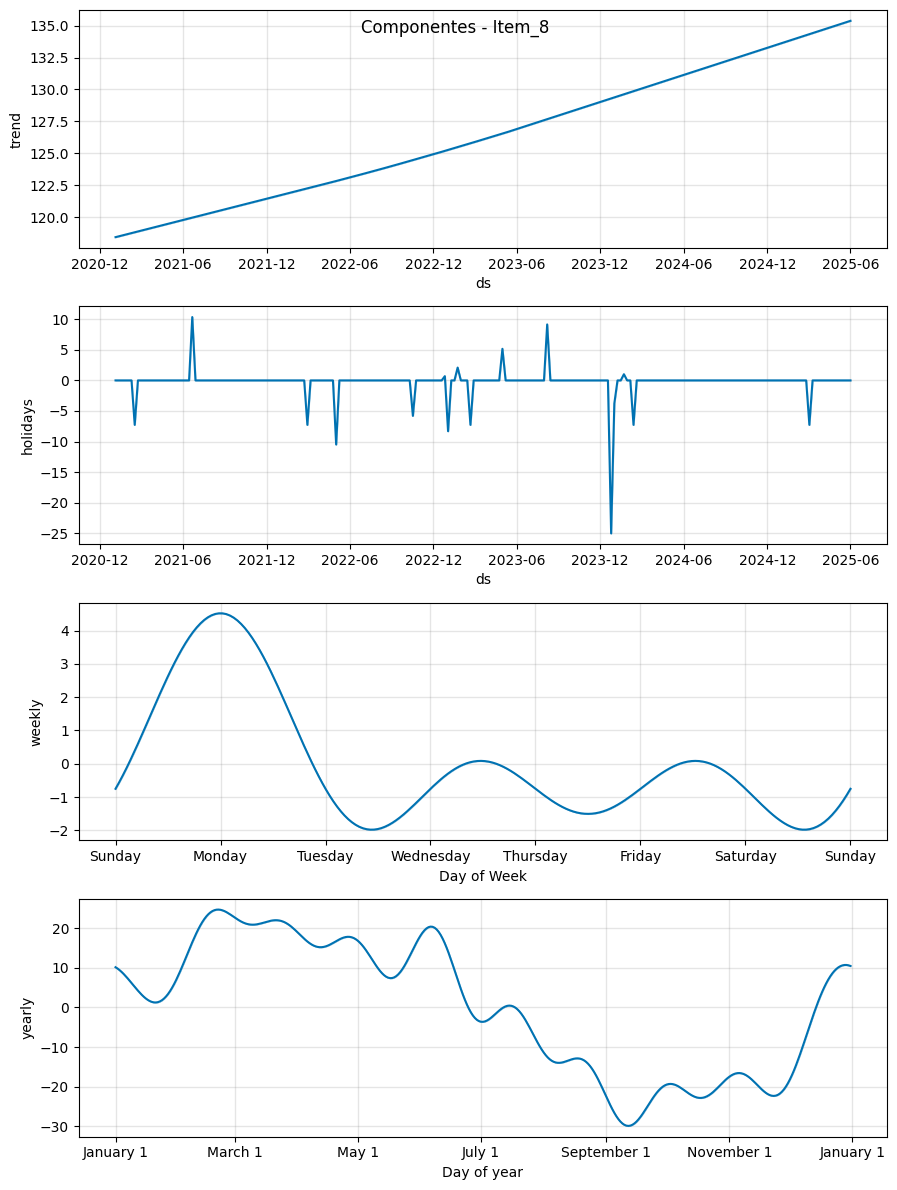

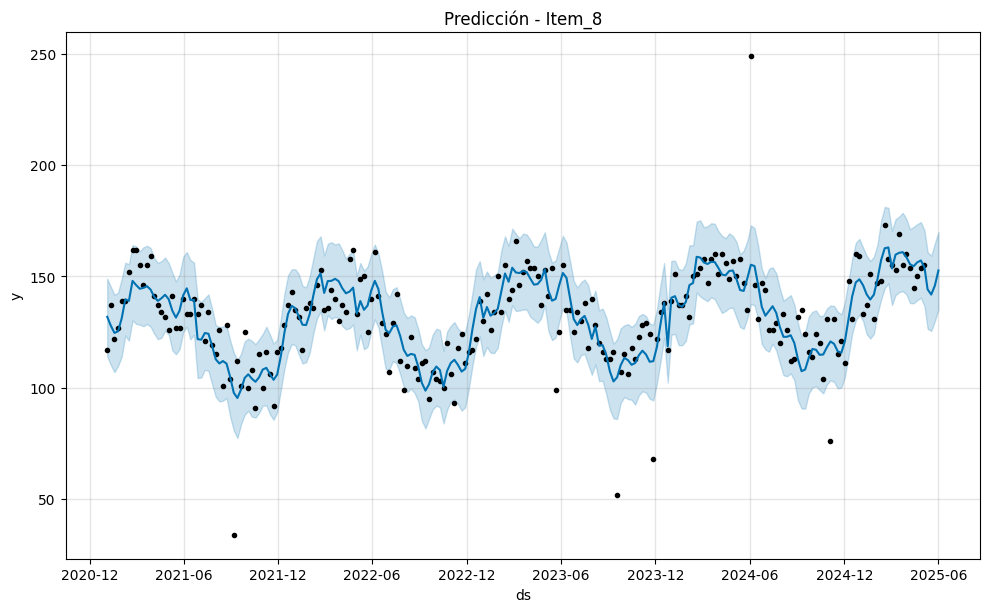

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/3e5jg1v6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/7xfzuak7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52351', 'data', 'file=/tmp/tmp1f77x41u/3e5jg1v6.json', 'init=/tmp/tmp1f77x41u/7xfzuak7.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model66oloze3/prophet_model-20250515001033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_9...


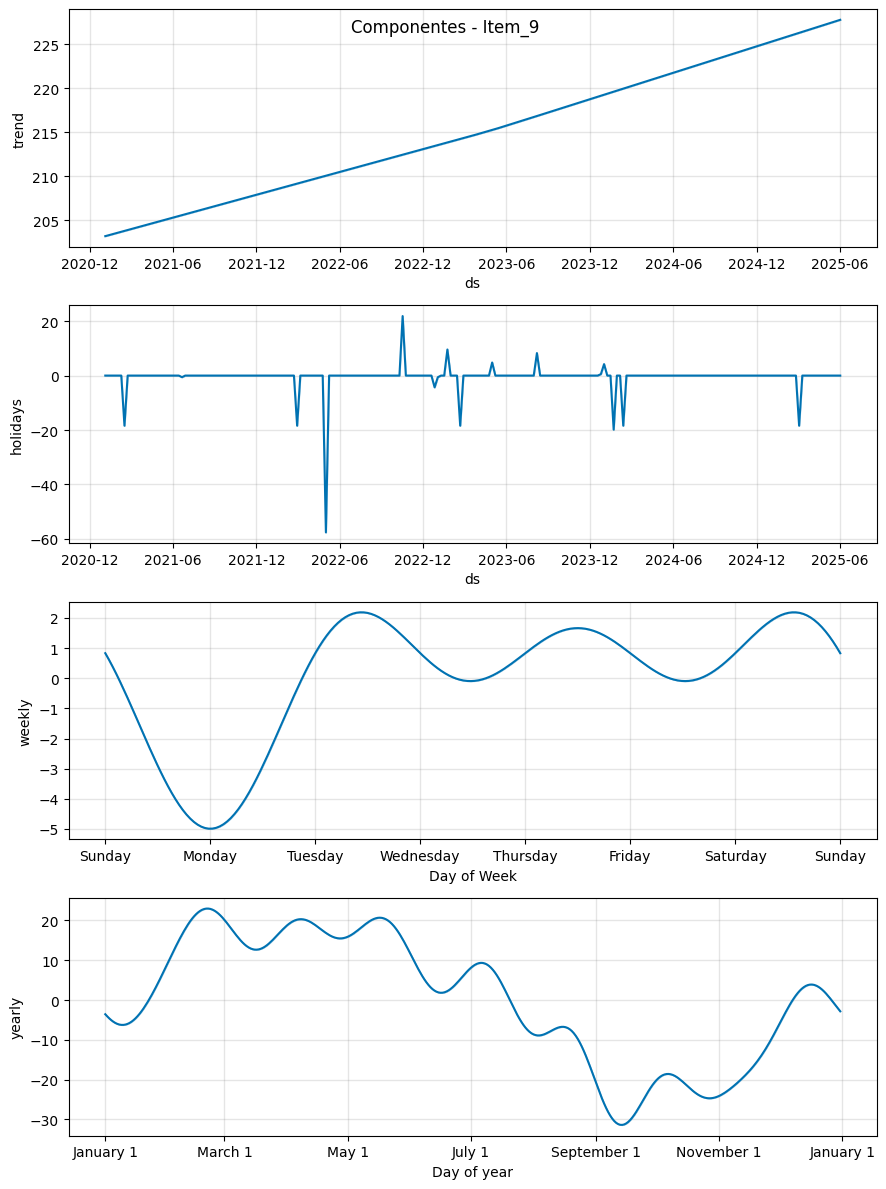

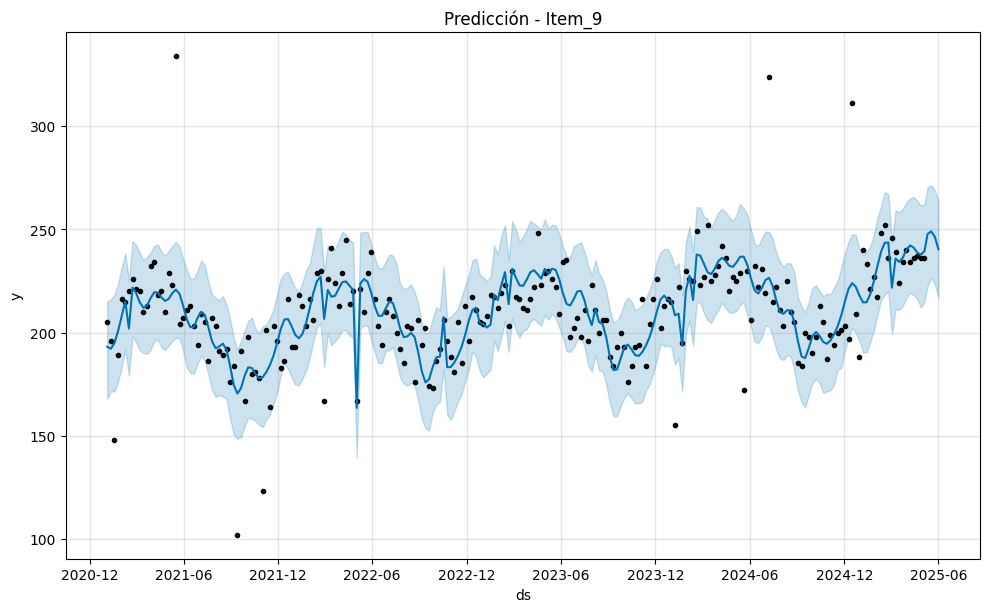

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/80z3mx4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/dqvpp12l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20646', 'data', 'file=/tmp/tmp1f77x41u/80z3mx4u.json', 'init=/tmp/tmp1f77x41u/dqvpp12l.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelr_gy11k2/prophet_model-20250515001034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_10...


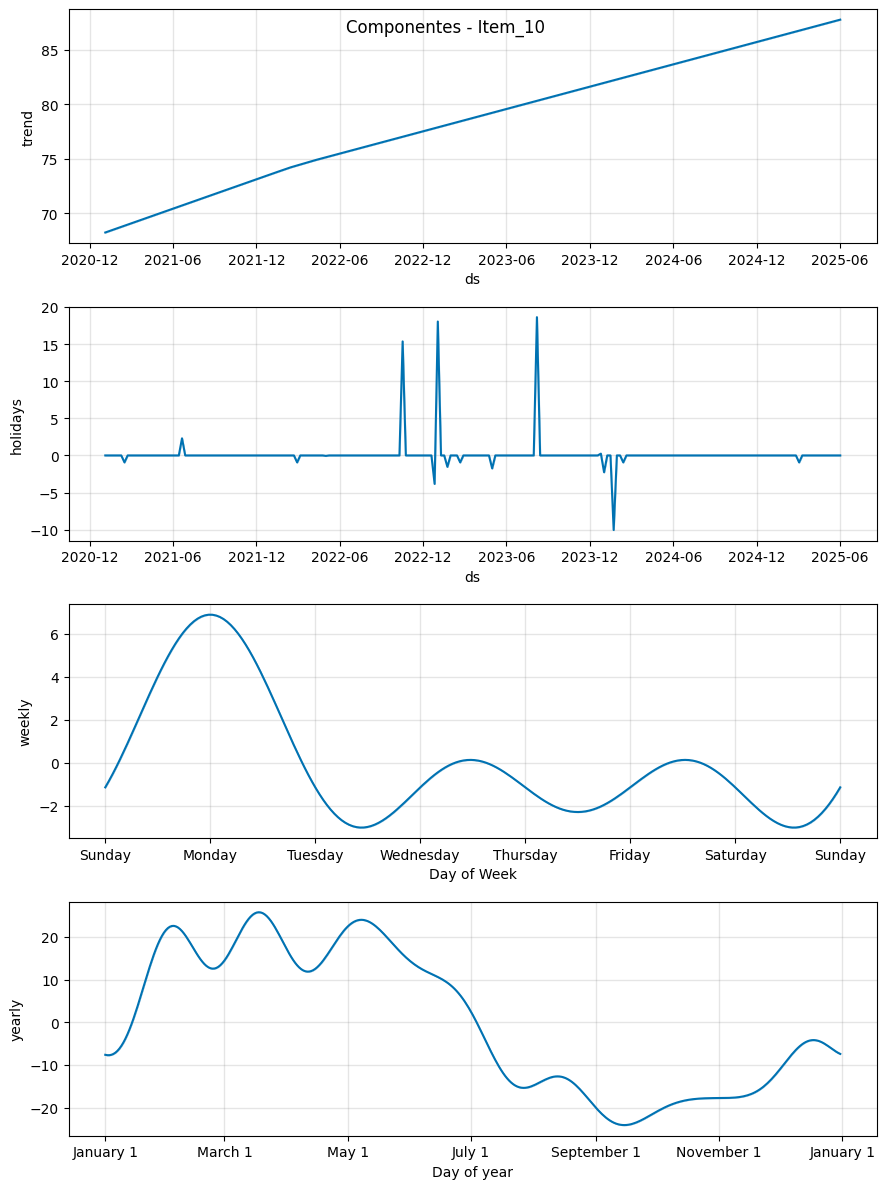

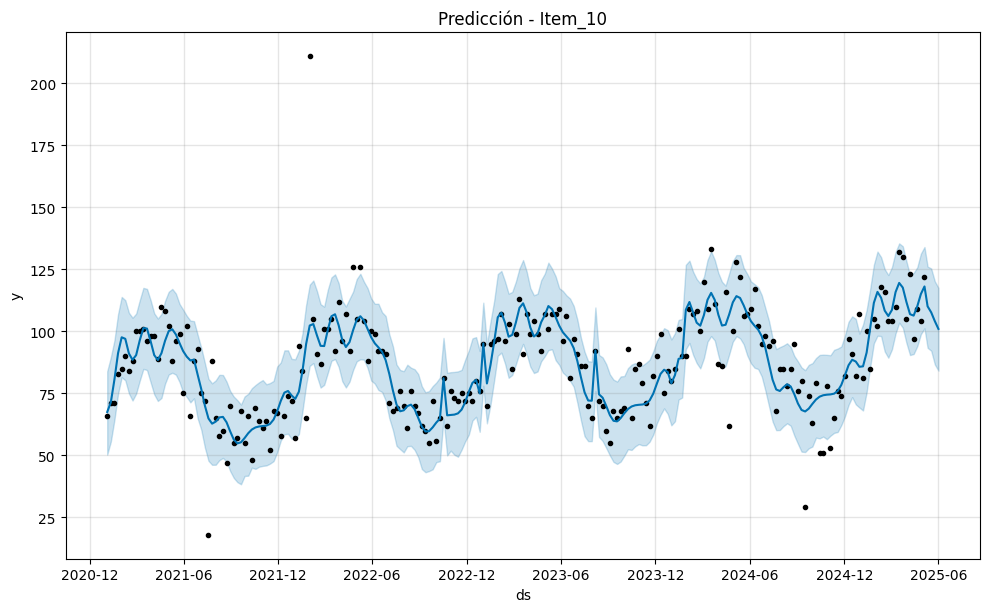

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/0h7xzm9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/dmrdynvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67256', 'data', 'file=/tmp/tmp1f77x41u/0h7xzm9i.json', 'init=/tmp/tmp1f77x41u/dmrdynvu.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelm9urdb4h/prophet_model-20250515001036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_11...


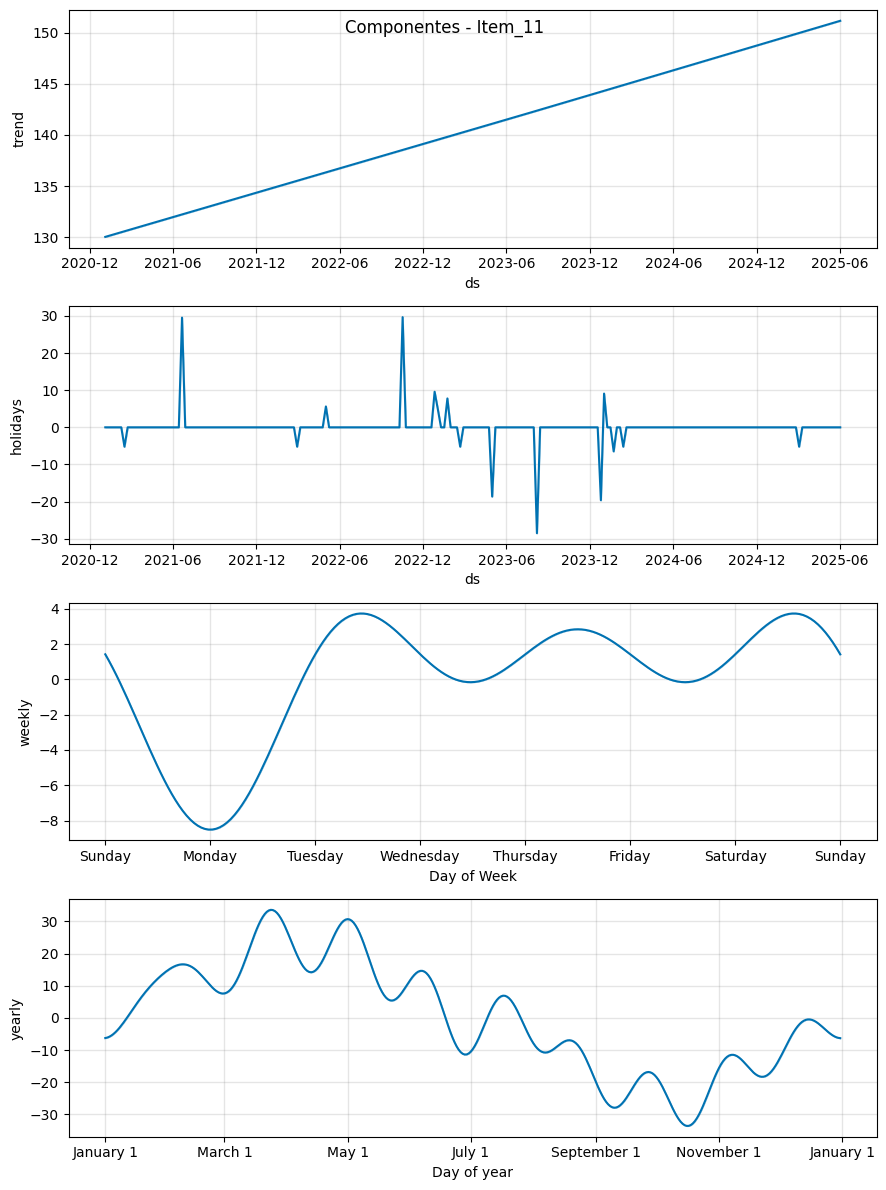

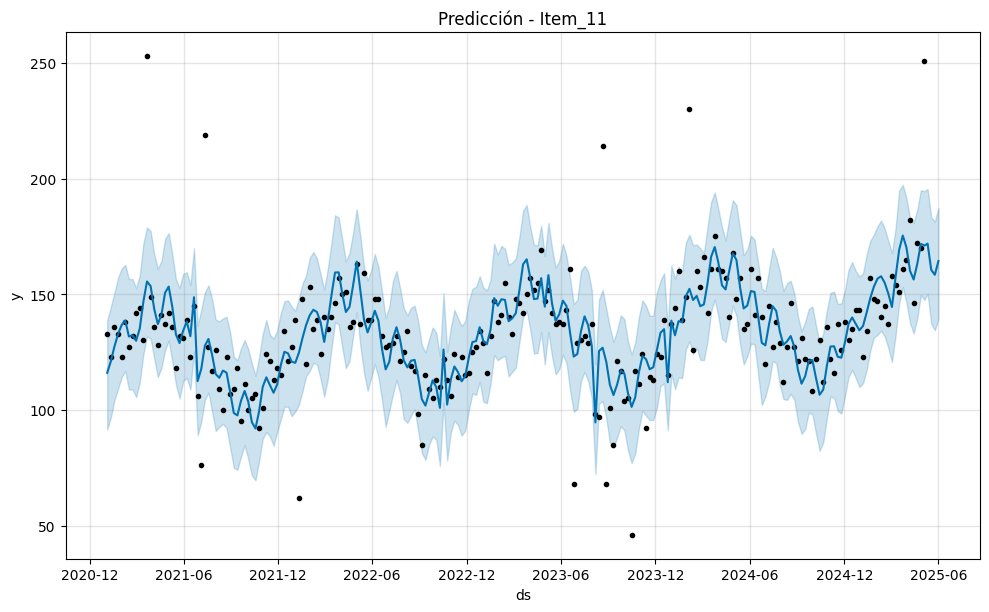

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/iednliga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/zzu5welq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42550', 'data', 'file=/tmp/tmp1f77x41u/iednliga.json', 'init=/tmp/tmp1f77x41u/zzu5welq.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model6f4pbgeo/prophet_model-20250515001037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_12...


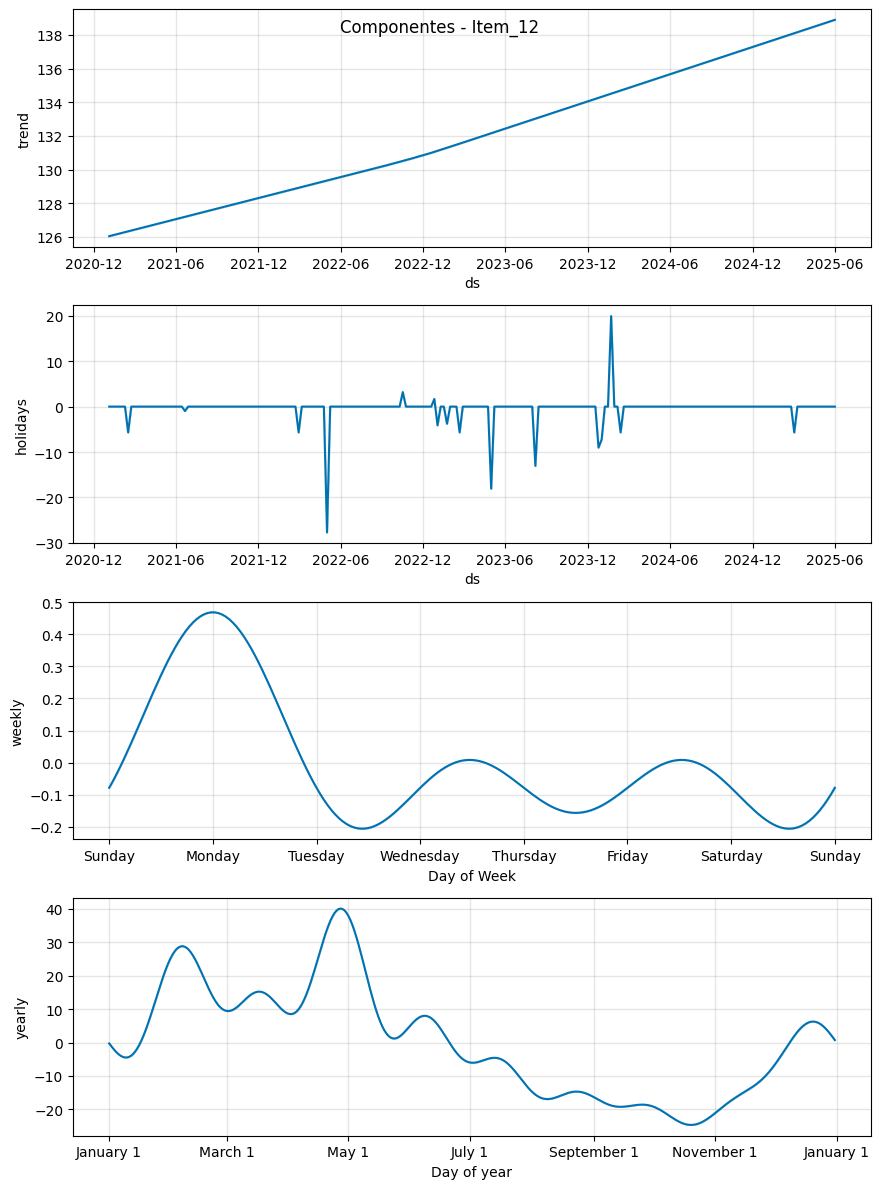

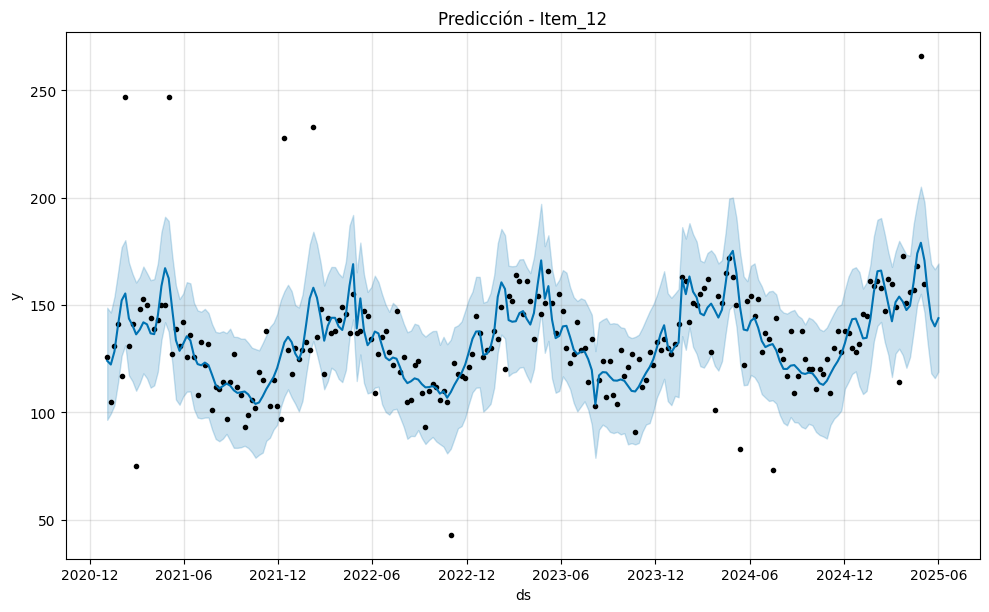

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/m7a80to2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/j7of5u6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61760', 'data', 'file=/tmp/tmp1f77x41u/m7a80to2.json', 'init=/tmp/tmp1f77x41u/j7of5u6u.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model39q8m6if/prophet_model-20250515001038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_13...


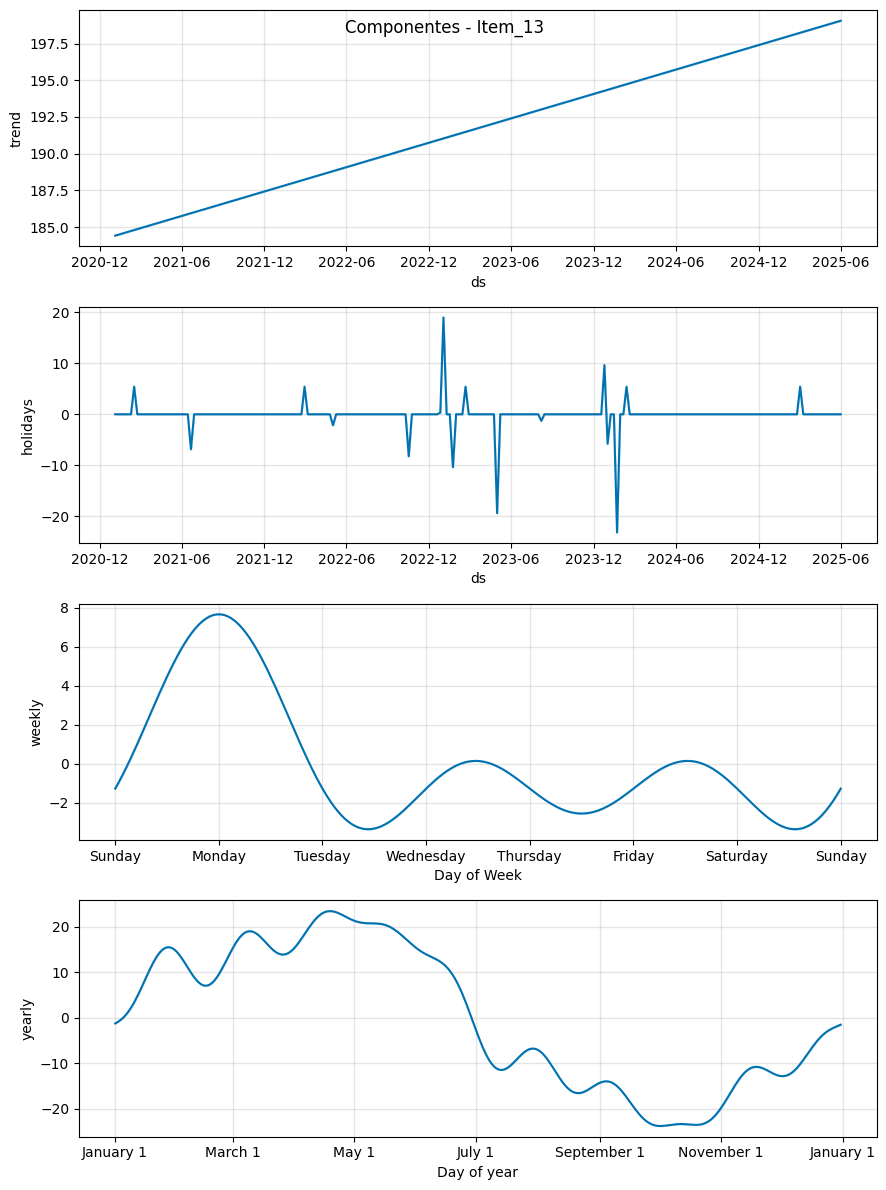

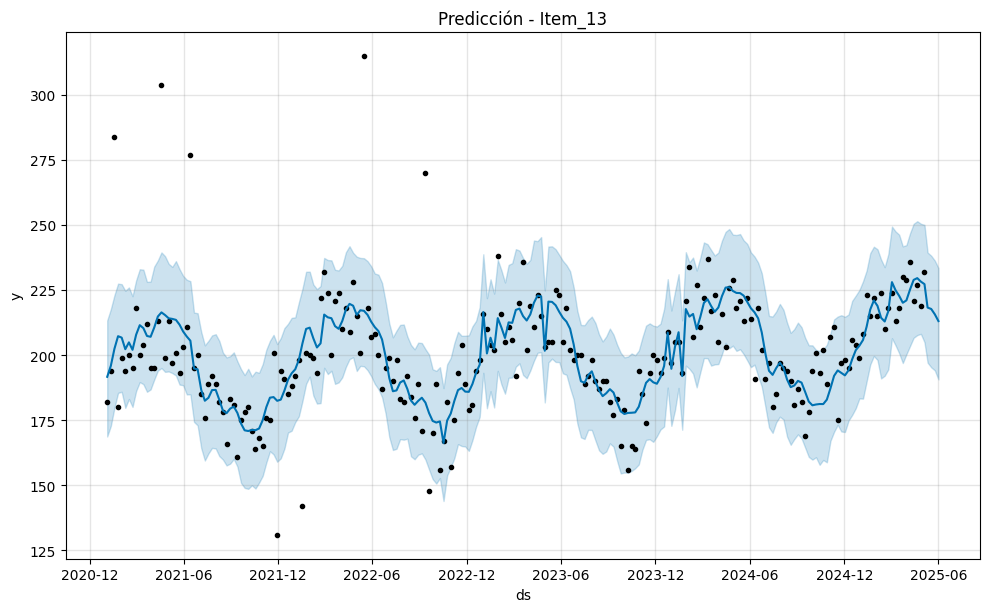

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/jf5trz6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/6d7i778l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75742', 'data', 'file=/tmp/tmp1f77x41u/jf5trz6f.json', 'init=/tmp/tmp1f77x41u/6d7i778l.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model75z7wwat/prophet_model-20250515001040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_14...


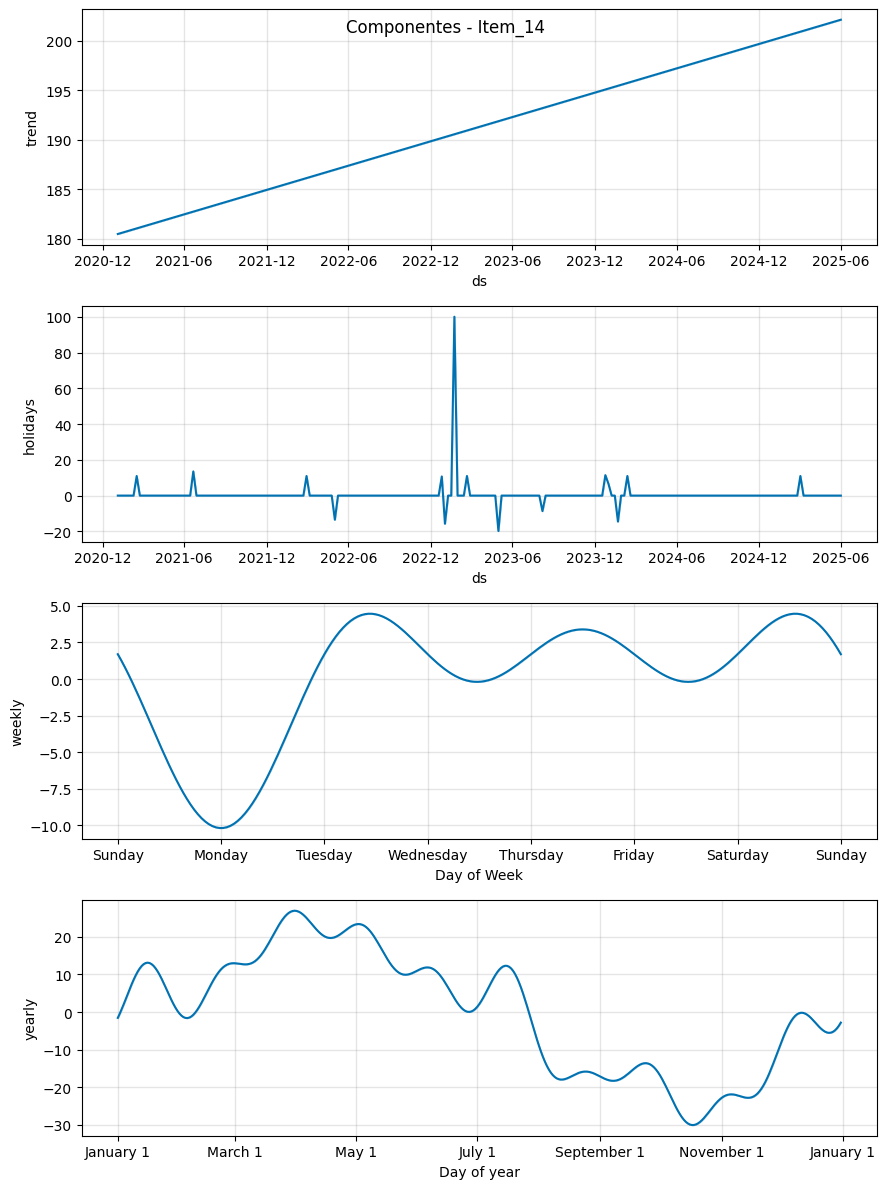

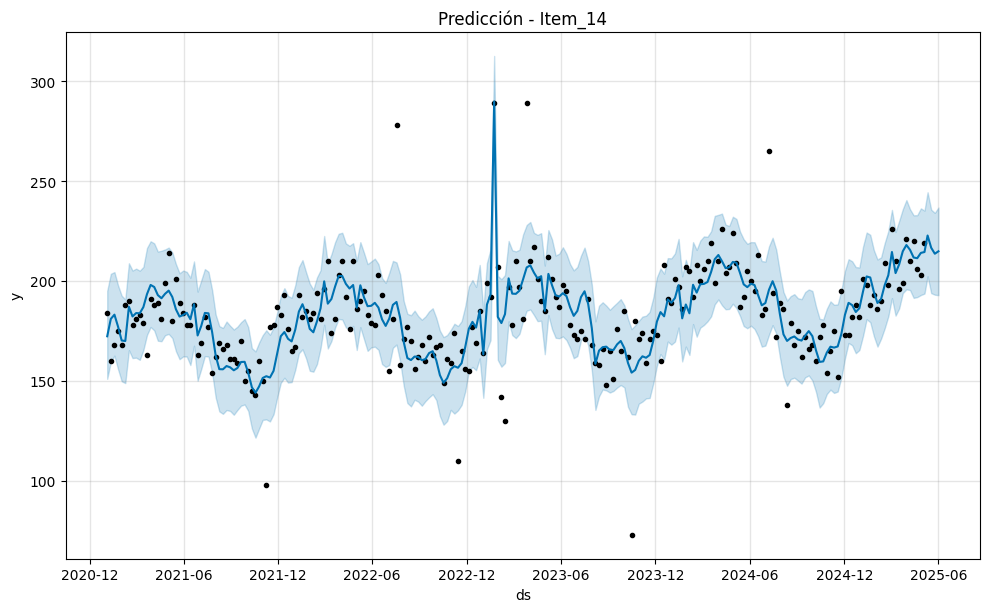

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/waxbrk0x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/lacsafud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60588', 'data', 'file=/tmp/tmp1f77x41u/waxbrk0x.json', 'init=/tmp/tmp1f77x41u/lacsafud.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model7er6m98g/prophet_model-20250515001041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_15...


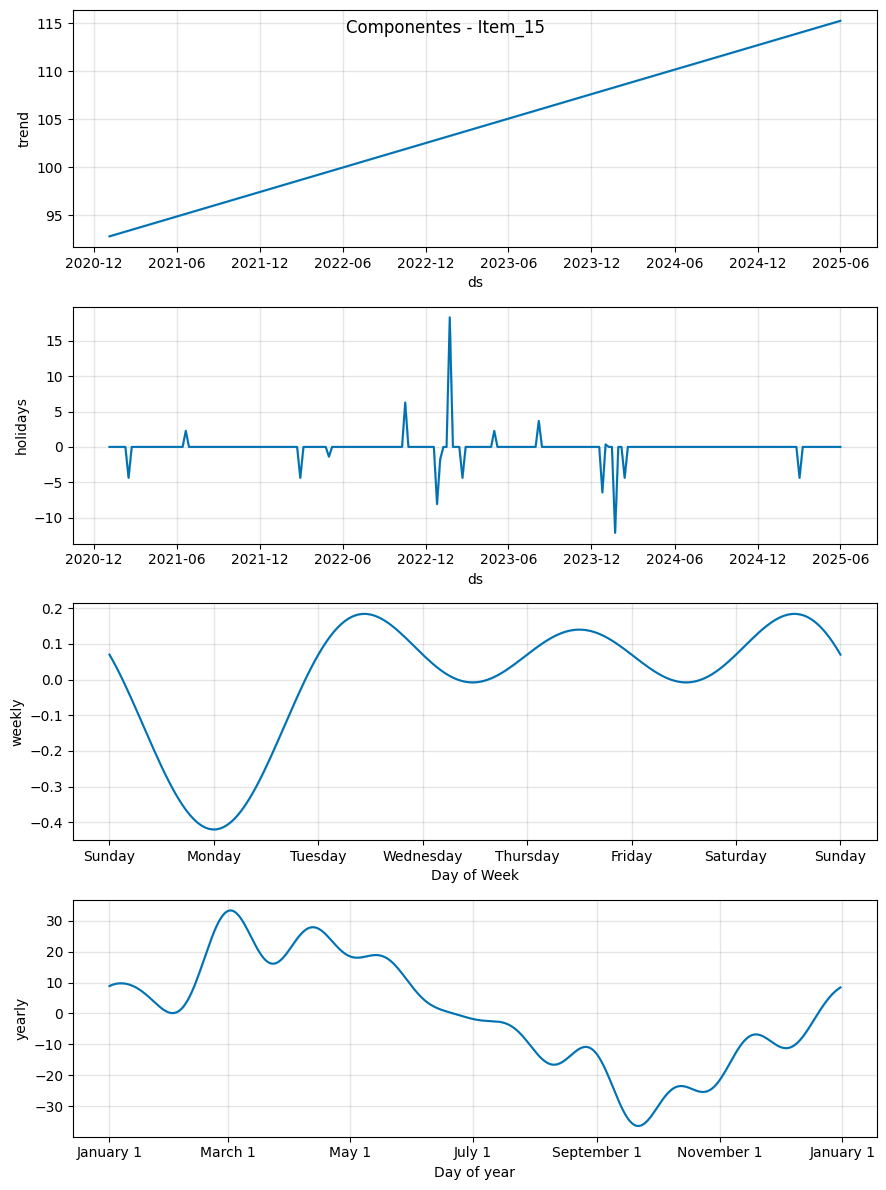

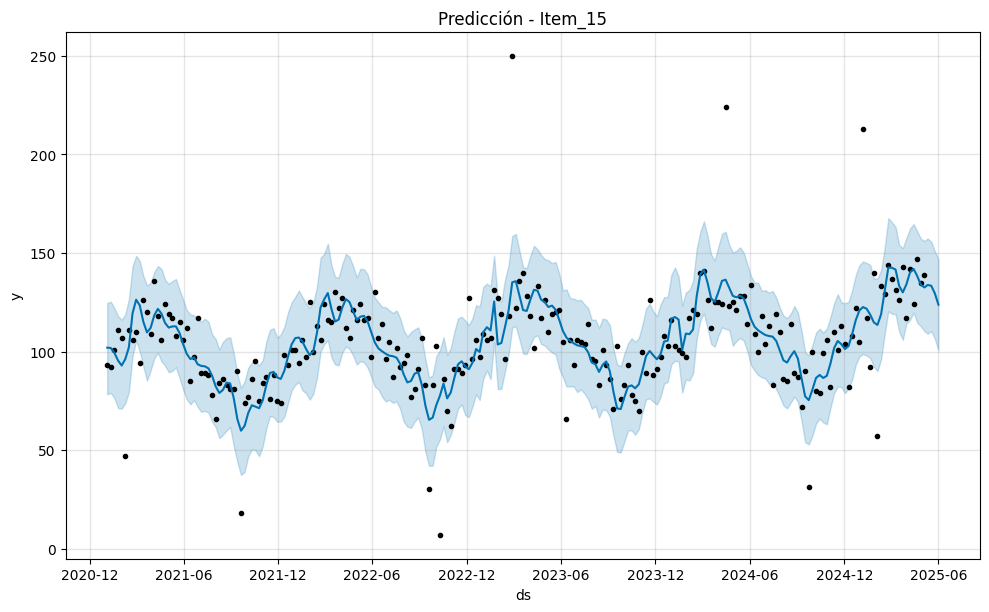

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/wdj2vrgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/3jl9puek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57656', 'data', 'file=/tmp/tmp1f77x41u/wdj2vrgy.json', 'init=/tmp/tmp1f77x41u/3jl9puek.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelpd5pqarm/prophet_model-20250515001043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_16...


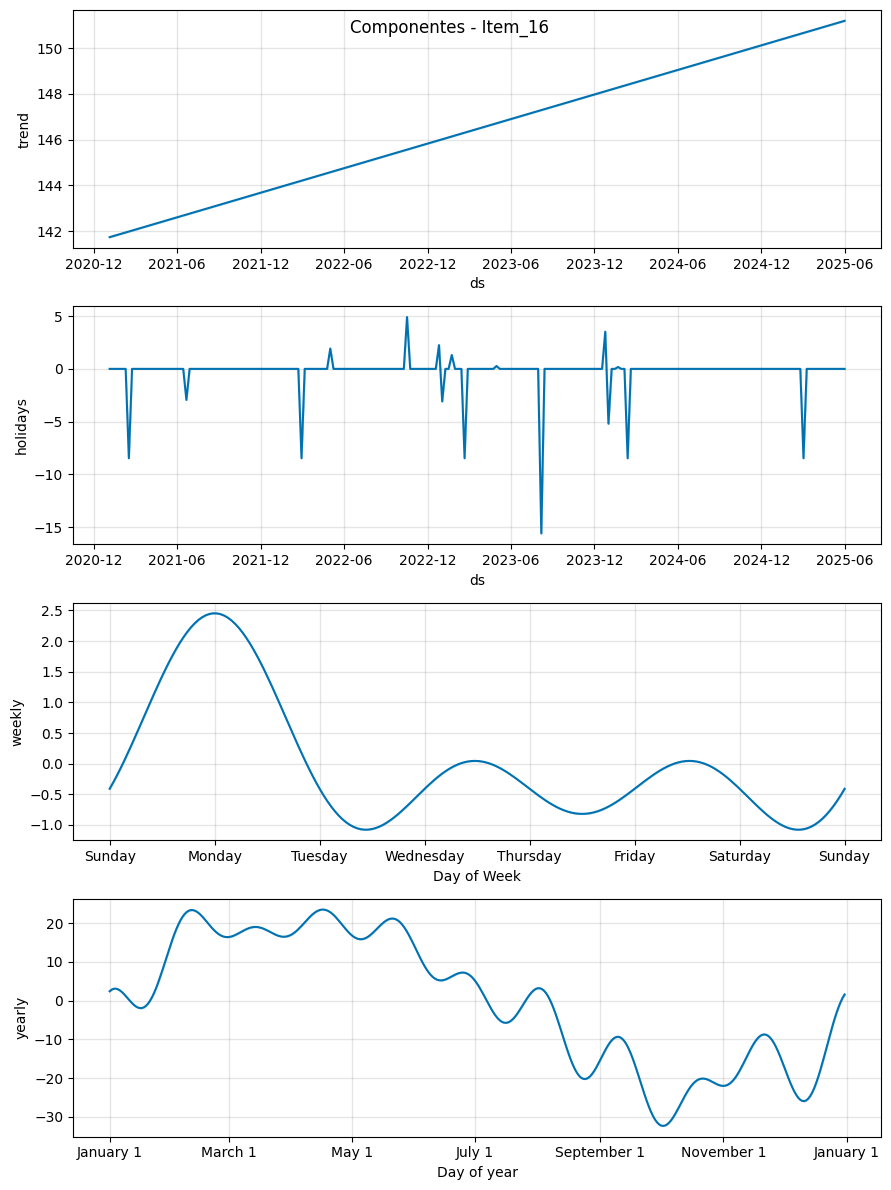

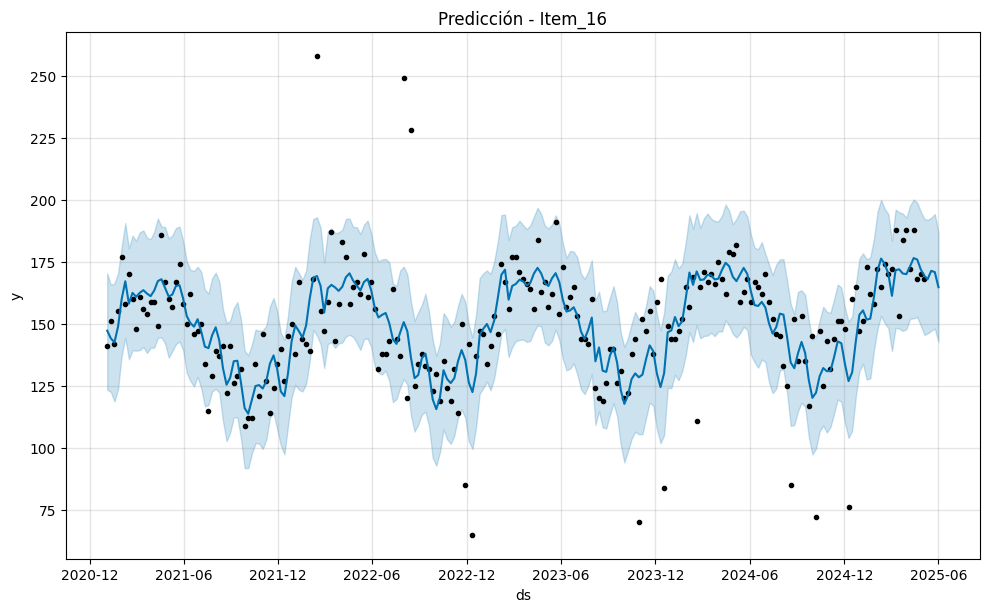

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/twnzudm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/b160kitx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23023', 'data', 'file=/tmp/tmp1f77x41u/twnzudm7.json', 'init=/tmp/tmp1f77x41u/b160kitx.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelaac1s1cy/prophet_model-20250515001045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediciendo Item_17...


00:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


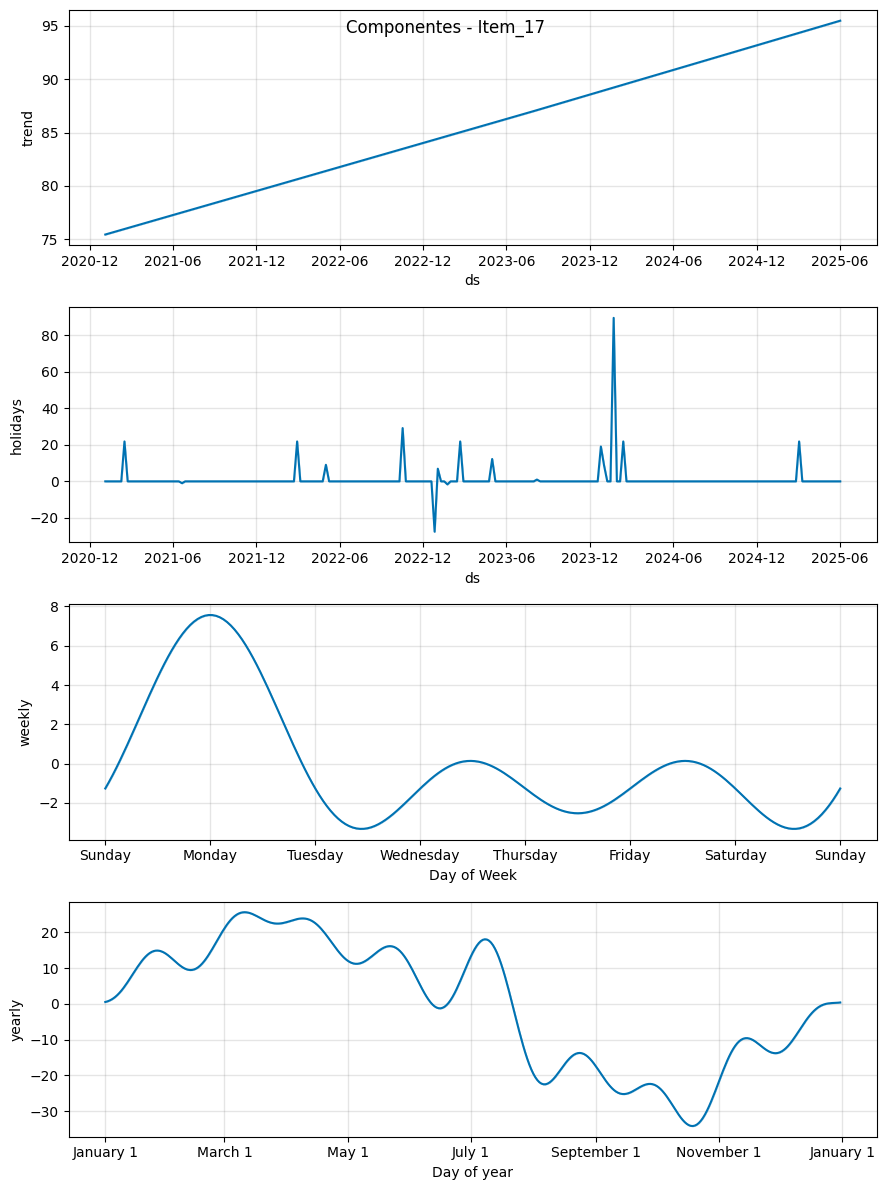

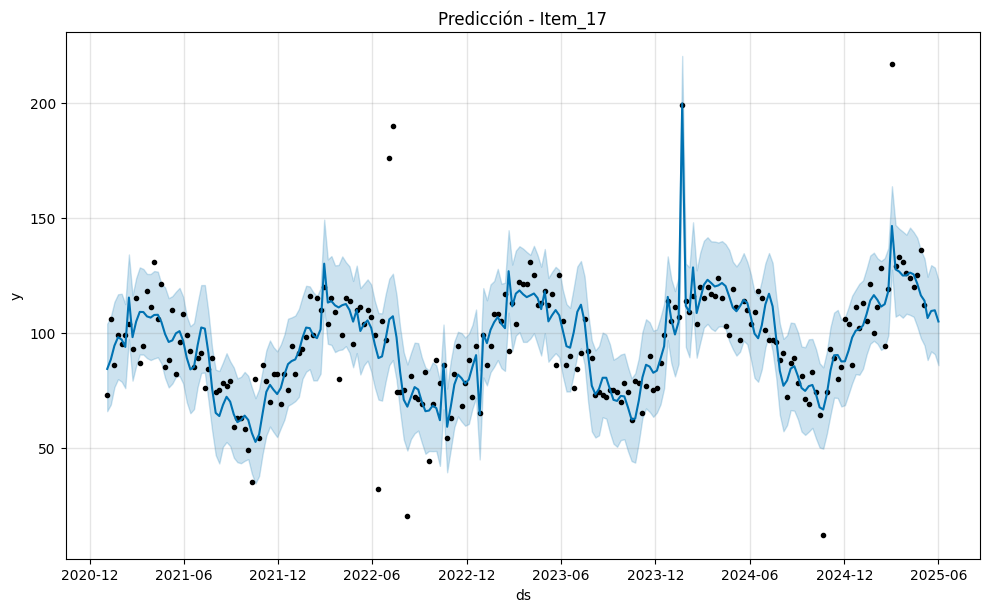

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/1rjw3jnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/20qrw4ih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60794', 'data', 'file=/tmp/tmp1f77x41u/1rjw3jnw.json', 'init=/tmp/tmp1f77x41u/20qrw4ih.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelzt33vasu/prophet_model-20250515001047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediciendo Item_18...


00:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


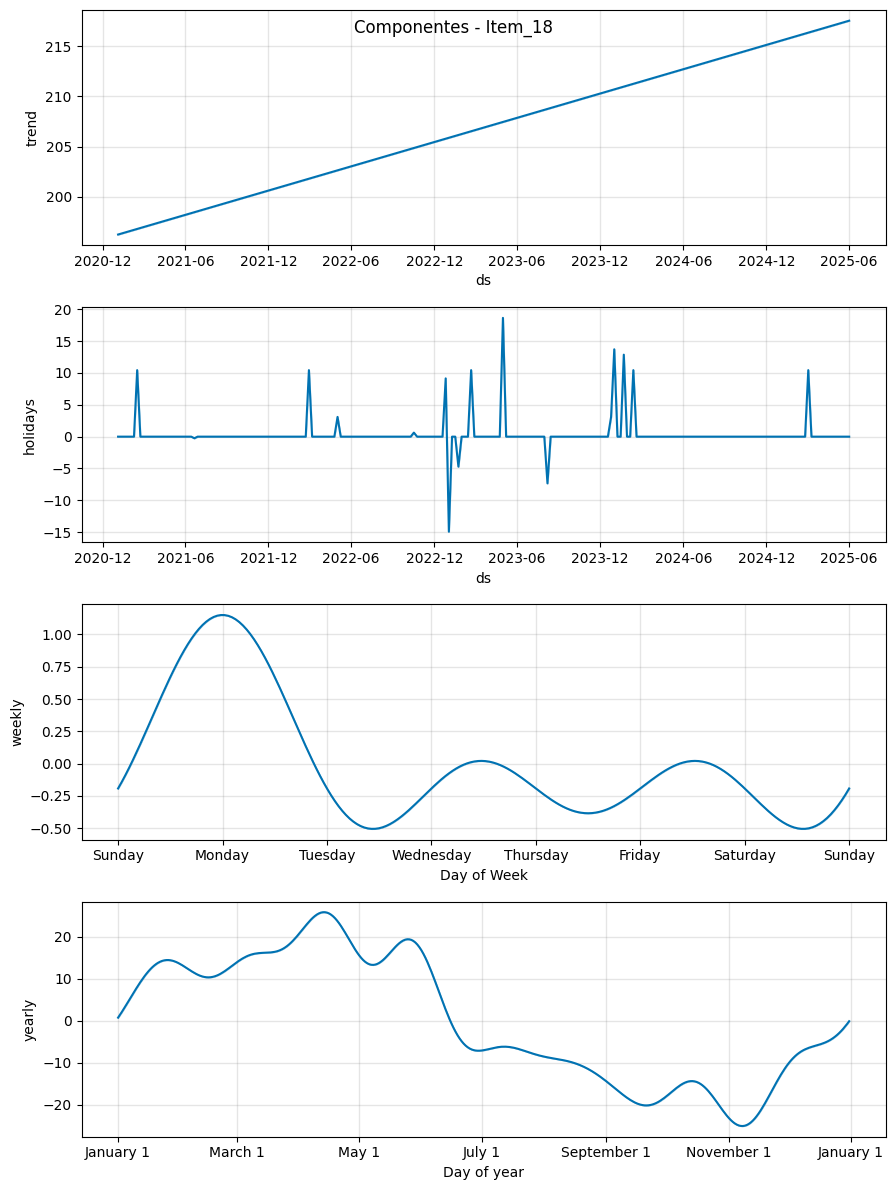

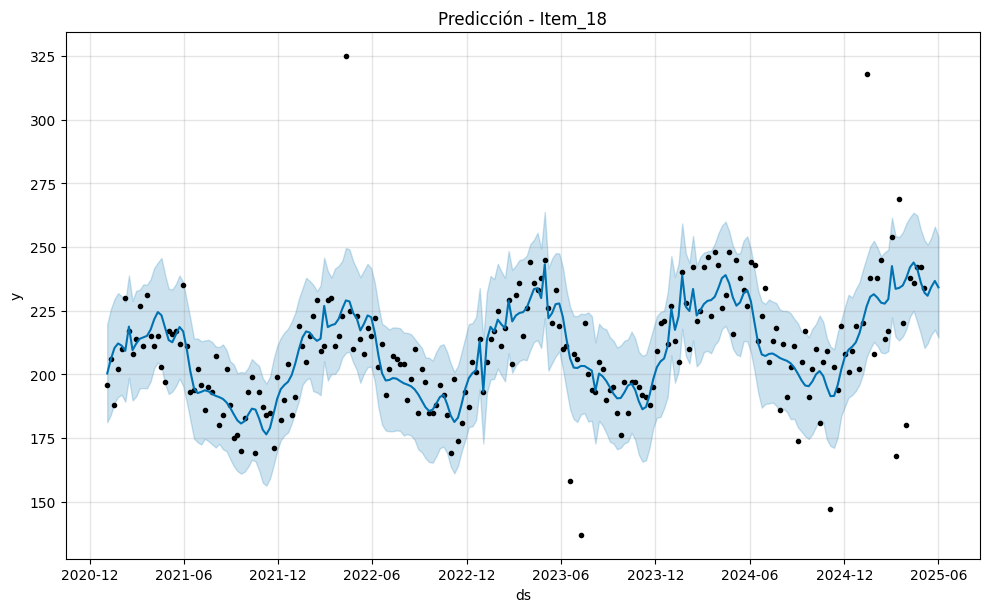

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/t6wqwlg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/9b61yxji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89799', 'data', 'file=/tmp/tmp1f77x41u/t6wqwlg8.json', 'init=/tmp/tmp1f77x41u/9b61yxji.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeln3o7fuka/prophet_model-20250515001049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediciendo Item_19...


00:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


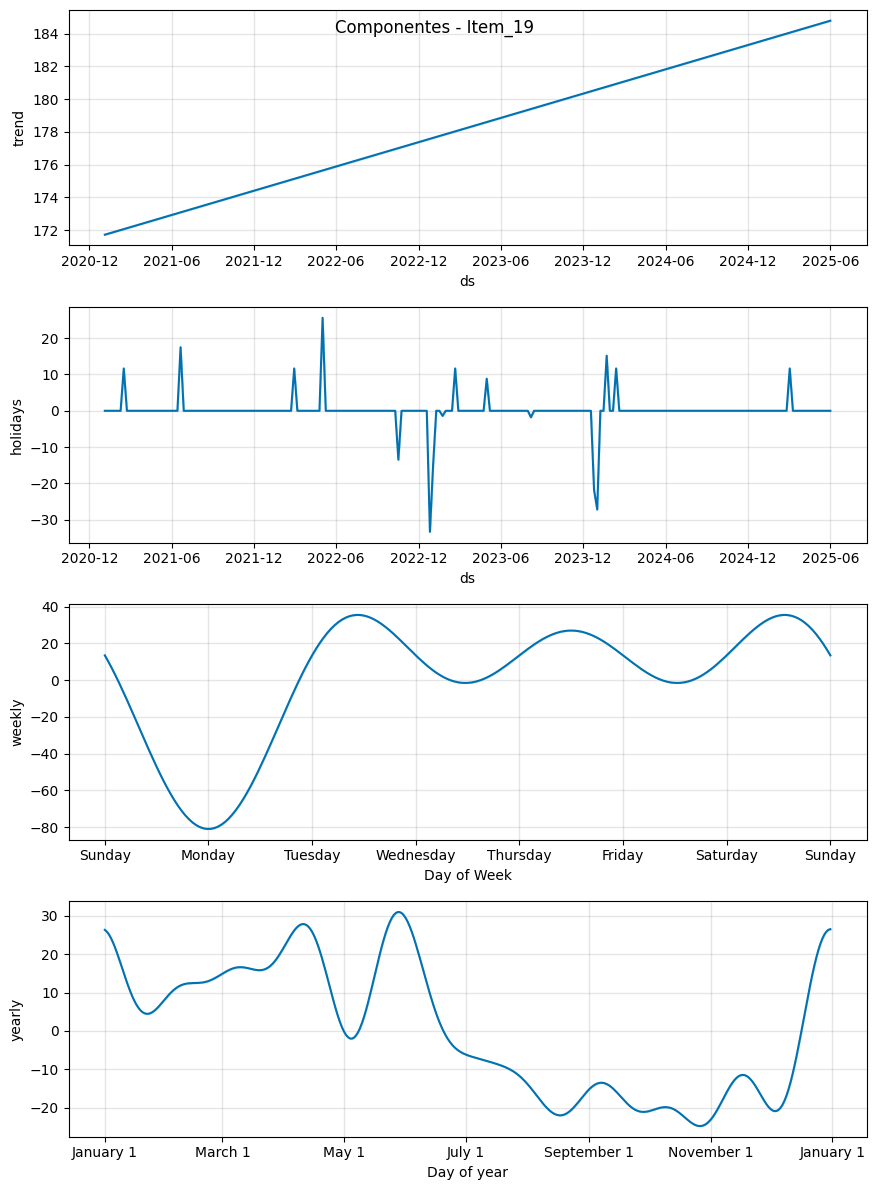

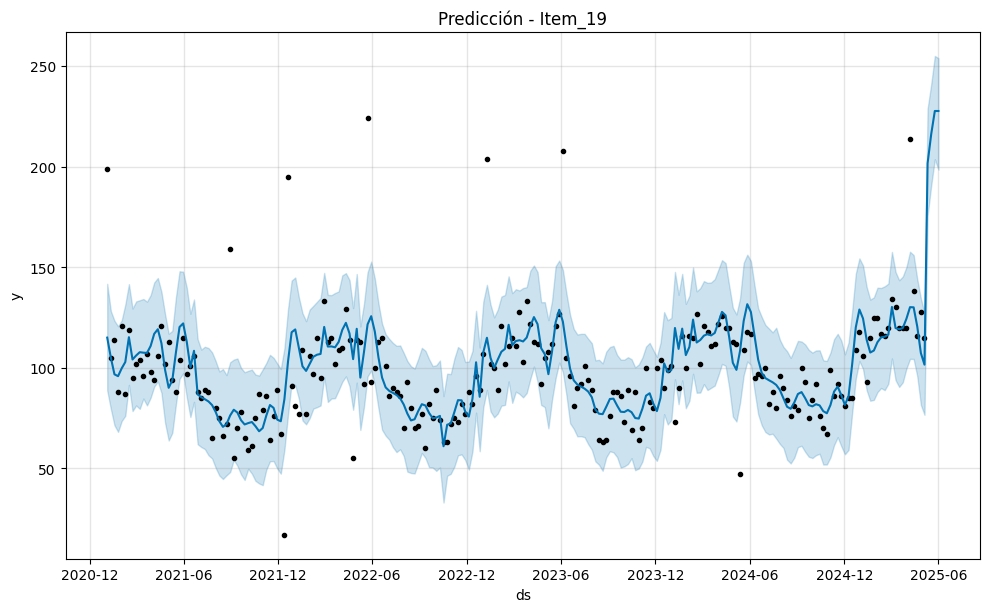

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/dkapx47k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/a1b60ort.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87221', 'data', 'file=/tmp/tmp1f77x41u/dkapx47k.json', 'init=/tmp/tmp1f77x41u/a1b60ort.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model51lj2oas/prophet_model-20250515001051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_20...


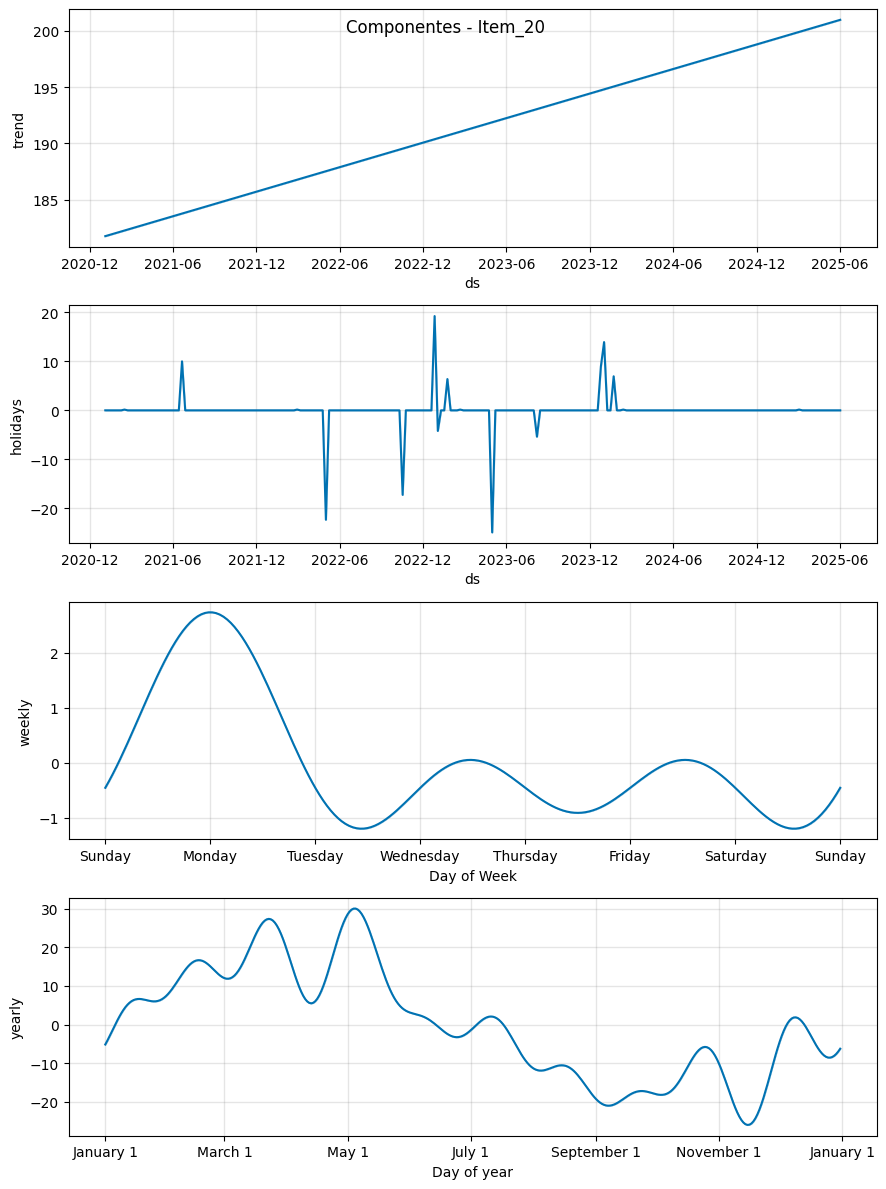

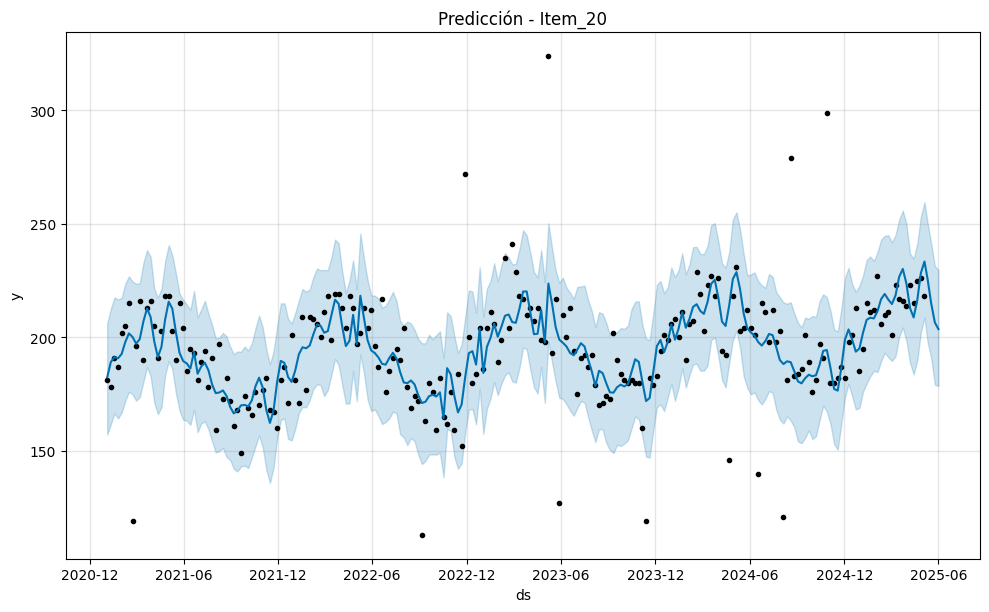

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/8mk17m0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/2fpm00fd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40210', 'data', 'file=/tmp/tmp1f77x41u/8mk17m0b.json', 'init=/tmp/tmp1f77x41u/2fpm00fd.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model6nxdq89q/prophet_model-20250515001052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_21...


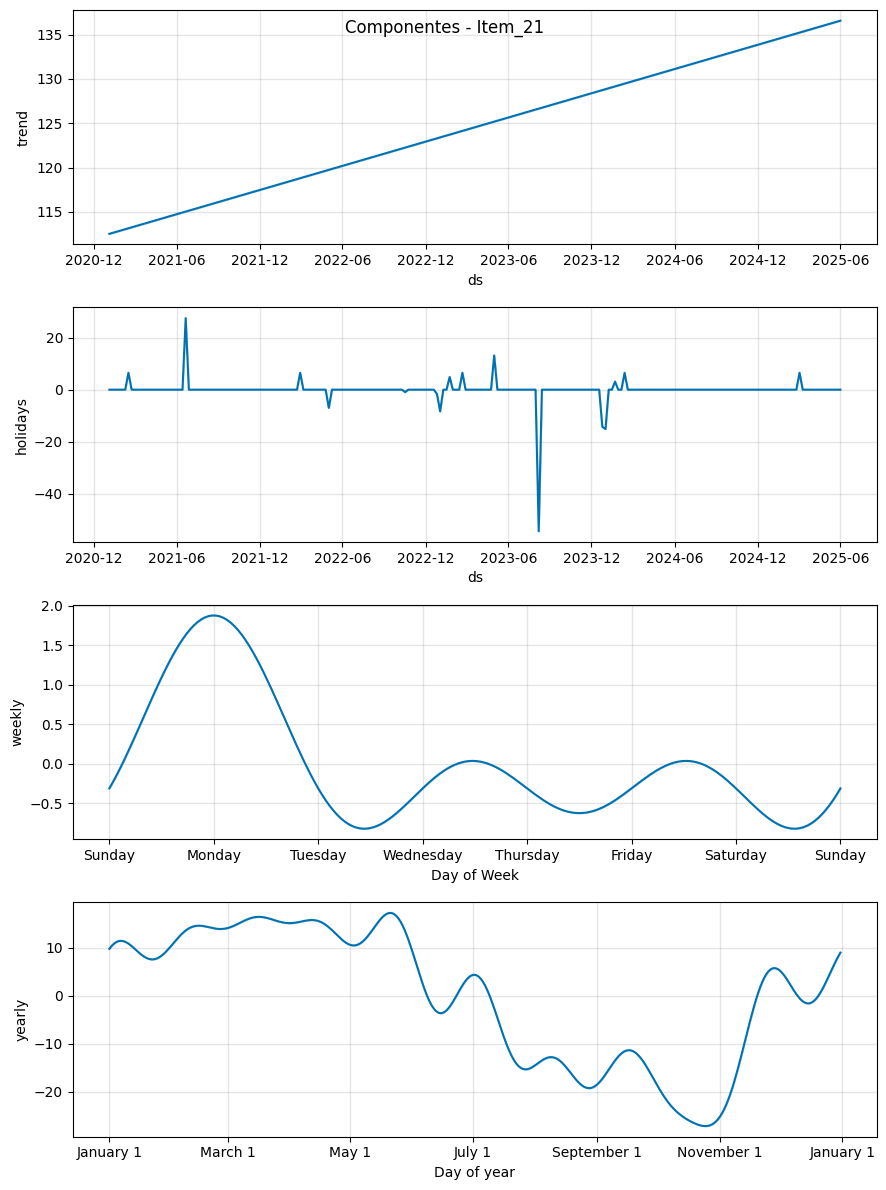

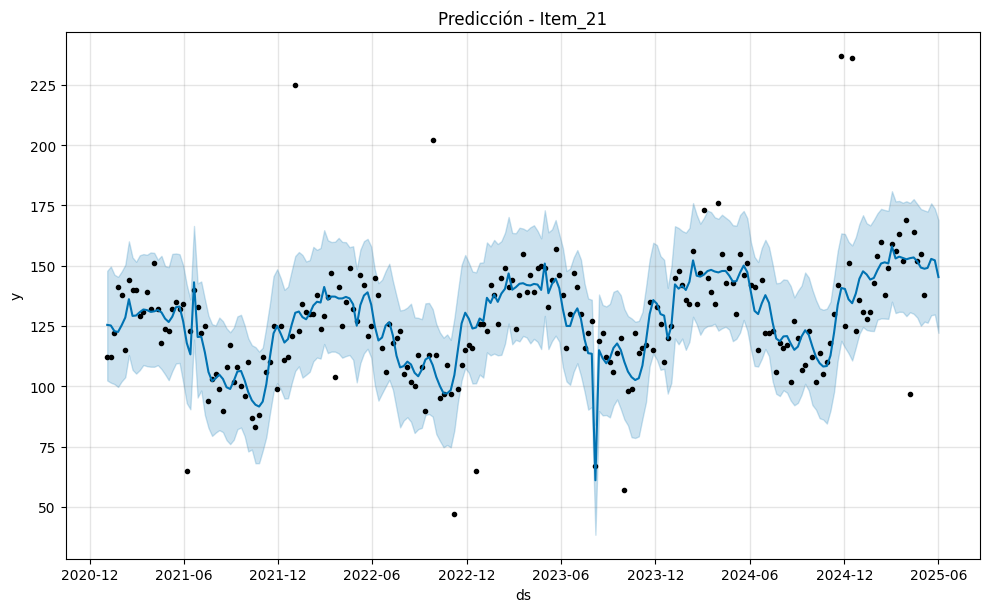

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/qi7hzfn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/_6x6x716.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21265', 'data', 'file=/tmp/tmp1f77x41u/qi7hzfn5.json', 'init=/tmp/tmp1f77x41u/_6x6x716.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelpihuu73o/prophet_model-20250515001054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_22...


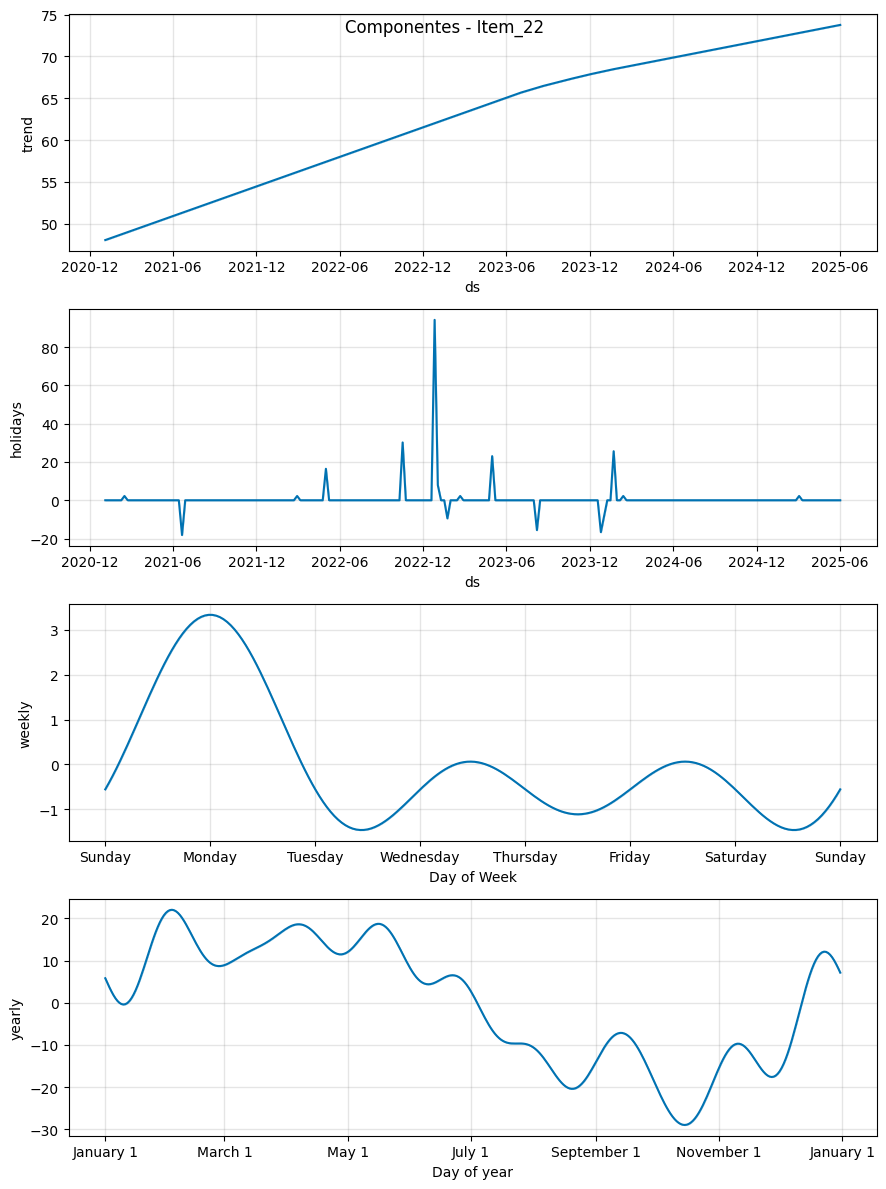

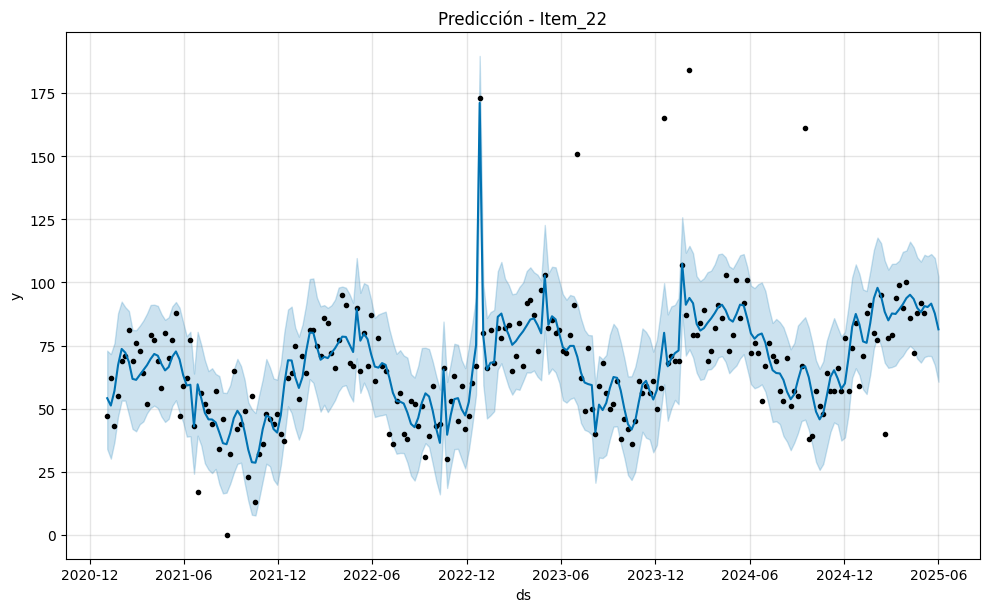

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/e2qnytuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/1px6e8f2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42255', 'data', 'file=/tmp/tmp1f77x41u/e2qnytuy.json', 'init=/tmp/tmp1f77x41u/1px6e8f2.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelv2jgn7k3/prophet_model-20250515001055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_23...


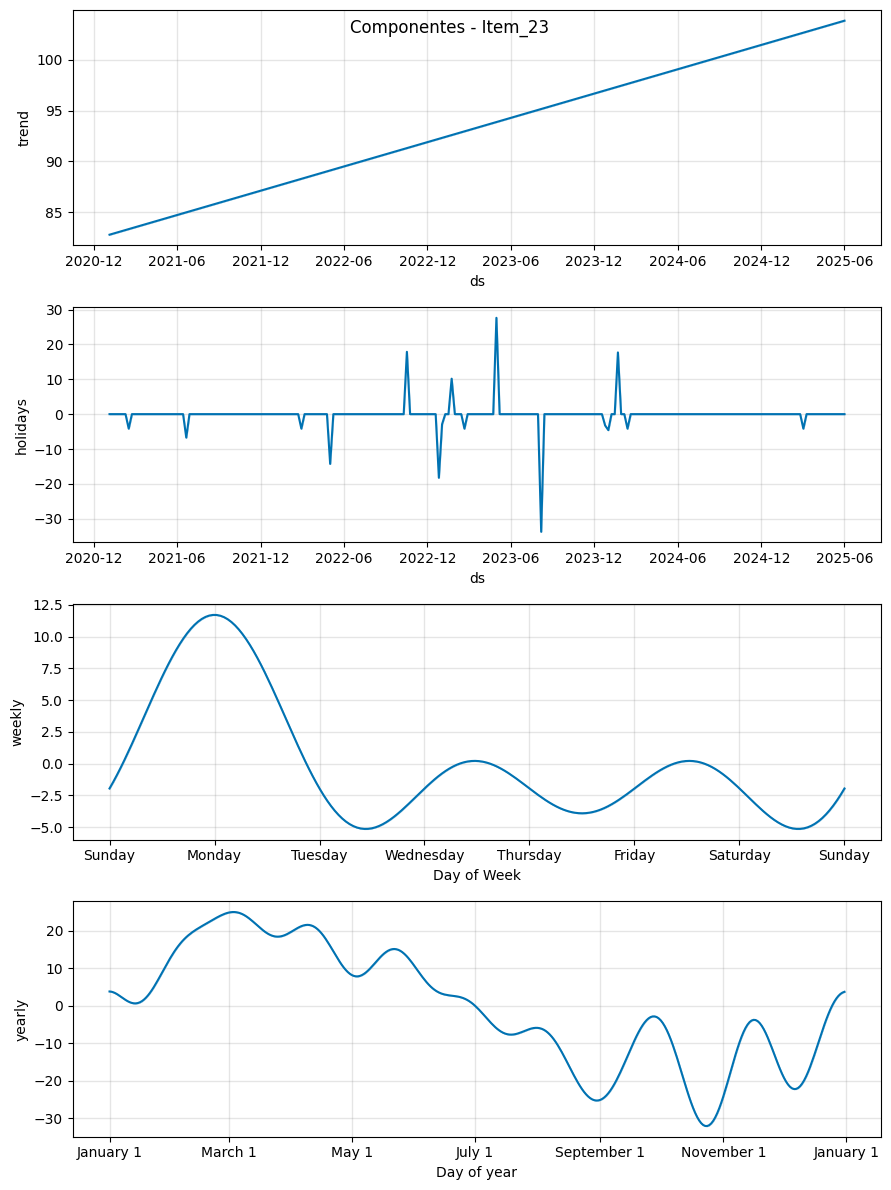

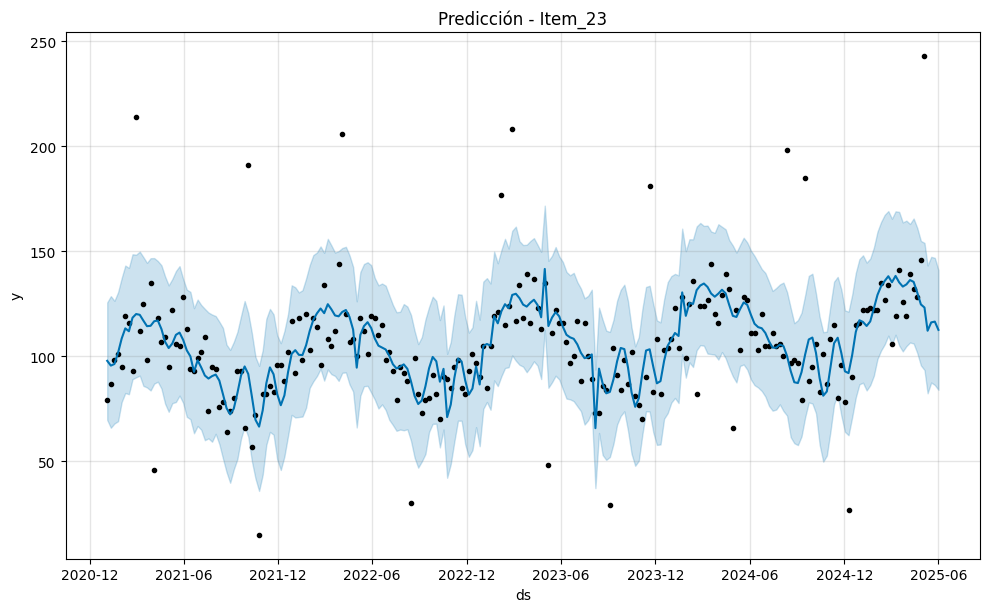

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/9dd1f3ee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/srs9t5zi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58199', 'data', 'file=/tmp/tmp1f77x41u/9dd1f3ee.json', 'init=/tmp/tmp1f77x41u/srs9t5zi.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modell93cp98s/prophet_model-20250515001057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prediciendo Item_24...


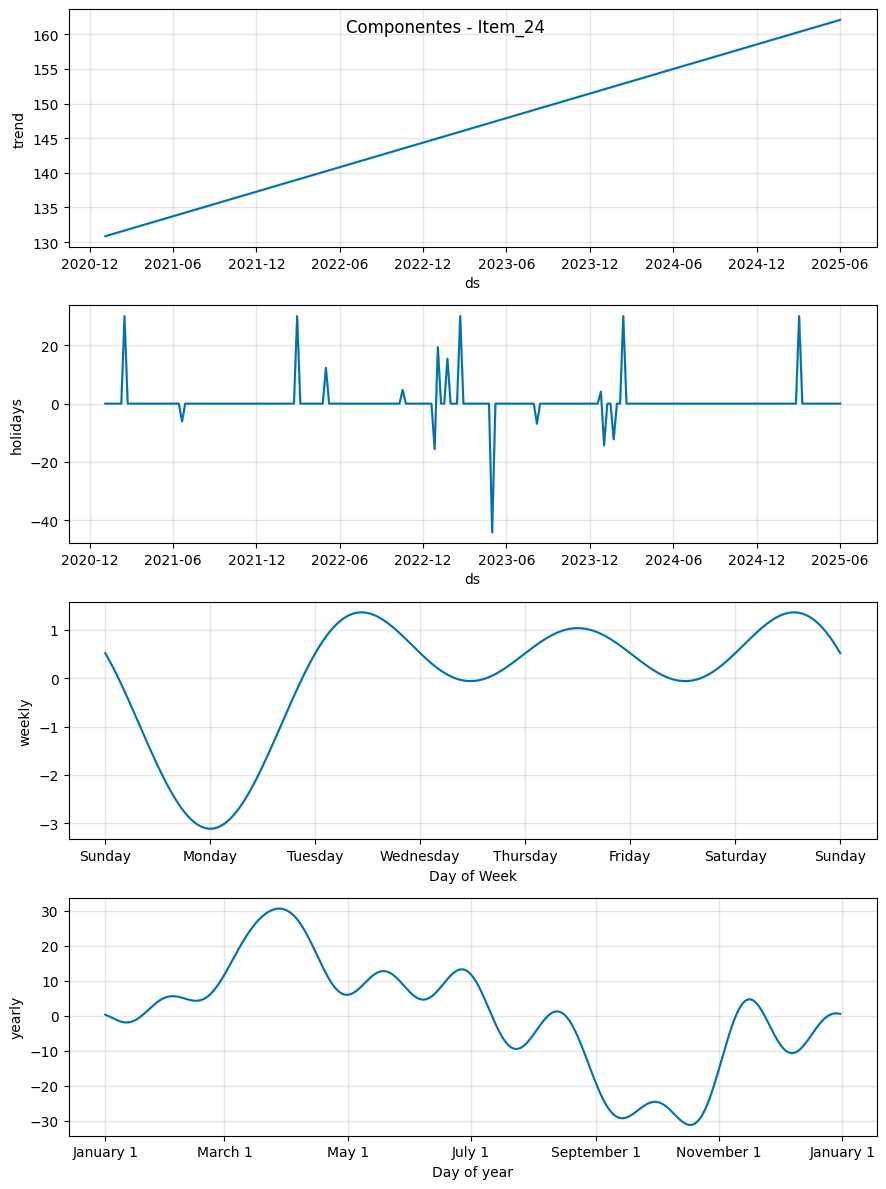

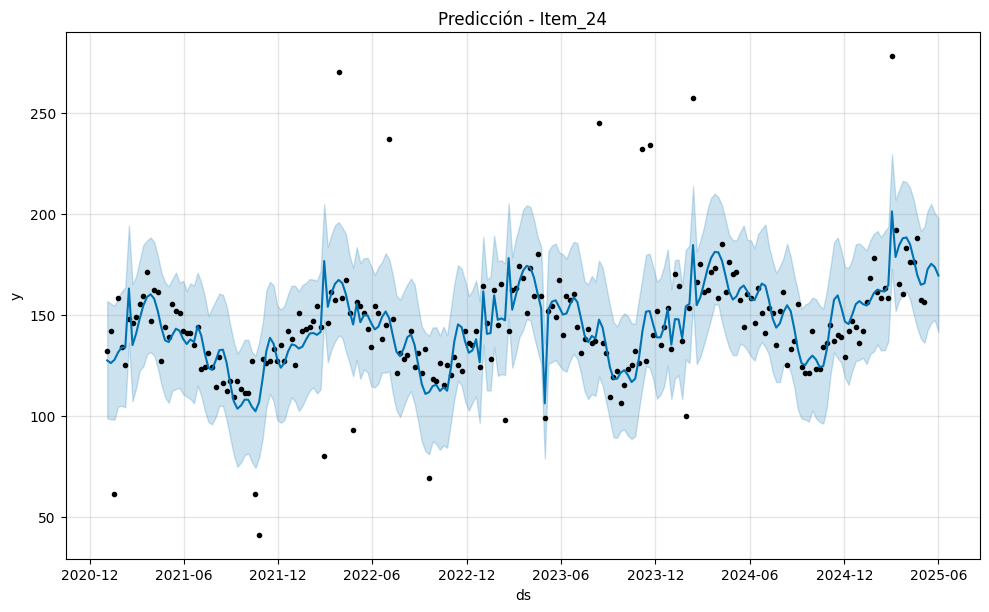

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/q8_qk2ej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/qbh0py8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47232', 'data', 'file=/tmp/tmp1f77x41u/q8_qk2ej.json', 'init=/tmp/tmp1f77x41u/qbh0py8n.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelchzfygrn/prophet_model-20250515001059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Prediciendo Item_25...


00:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


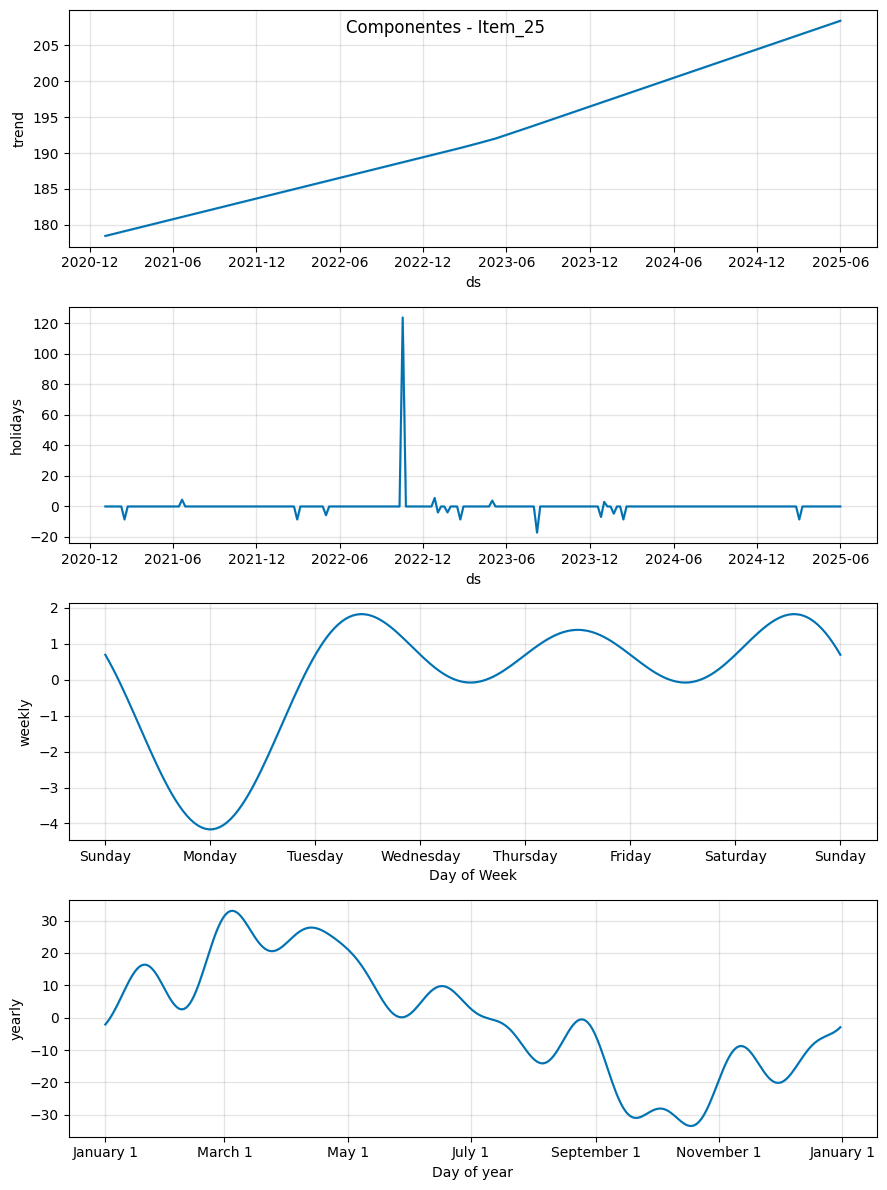

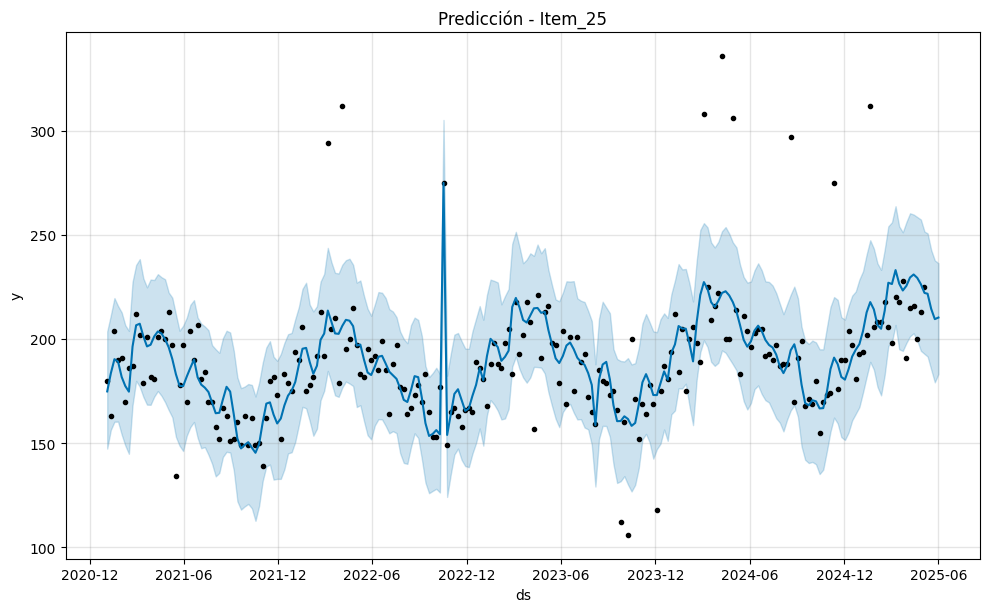


🔮 Predicciones Futuras:
            Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
2025-05-11  173.27  188.87  159.89   85.24  171.52   86.19  124.47  144.22   
2025-05-18  174.32  184.64  154.13   82.19  172.75   83.06  112.99  141.85   
2025-05-25  176.22  182.63  150.14   84.21  174.92   78.85  101.22  145.82   
2025-06-01  175.71  182.95  151.25   88.25  173.12   75.85  100.13  152.68   

            Item_9  Item_10  ...  Item_16  Item_17  Item_18  Item_19  Item_20  \
2025-05-11  247.75   110.08  ...   167.98   106.38   230.85   201.71   225.66   
2025-05-18  249.01   107.64  ...   171.38   109.46   234.21   216.16   214.92   
2025-05-25  246.37   104.11  ...   170.87   109.77   236.67   227.68   206.58   
2025-06-01  240.32   100.97  ...   164.80   104.88   234.14   227.67   203.61   

            Item_21  Item_22  Item_23  Item_24  Item_25  
2025-05-11   149.12    90.25   112.15   172.45   221.78  
2025-05-18   152.86    91.60   116.12   175.13   214.49  
2025

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# URL del archivo Excel
url = "https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx "

# Cargar los datos desde el archivo Excel
df = pd.read_excel(url)

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Mostrar ejemplo de datos
print("Datos cargados:")
print(df.head())

# Crear un diccionario para guardar las proyecciones
forecast_results = {}

# Número de semanas a predecir
weeks_to_forecast = 4

for item in df.columns[1:]:  # Iterar sobre los items
    print(f"\nPrediciendo {item}...")

    # Preparar los datos para Prophet: debe tener columnas ['ds', 'y']
    prophet_df = df[['Fecha', item]]
    prophet_df.columns = ['ds', 'y']

    # Inicializar y entrenar el modelo
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10.0
    )
    model.add_country_holidays(country_name='Bolivia')  # Opcional: agregar feriados
    model.fit(prophet_df)

    # Crear dataframe de fechas futuras
    future = model.make_future_dataframe(periods=weeks_to_forecast, freq='W')

    # Hacer la predicción
    forecast = model.predict(future)

    # Guardar predicciones futuras
    forecast_results[item] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(weeks_to_forecast)

    # Gráfico de componentes
    fig1 = model.plot_components(forecast)
    plt.suptitle(f"Componentes - {item}")
    plt.show()

    # Gráfico de predicción
    fig2 = model.plot(forecast)
    plt.title(f"Predicción - {item}")
    plt.show()

# Combinar todas las predicciones en un solo DataFrame
final_forecast = pd.DataFrame()
for item, result in forecast_results.items():
    final_forecast[item] = result['yhat'].values

final_forecast.index = forecast_results[item]['ds'].values

# Mostrar predicciones finales
print("\n🔮 Predicciones Futuras:")
print(final_forecast.round(2))



In [4]:
import pandas as pd
from prophet import Prophet

# URL del archivo Excel
url = "https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx "

# Cargar los datos
df = pd.read_excel(url)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Número de semanas a predecir
weeks_to_forecast = 12

# Diccionario para guardar las predicciones
future_predictions = {}

# Iterar sobre cada item
for item in df.columns[1:]:
    # Preparar datos para Prophet
    prophet_df = df[['Fecha', item]]
    prophet_df.columns = ['ds', 'y']

    # Inicializar y entrenar el modelo
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.add_country_holidays(country_name='Bolivia')  # Opcional
    model.fit(prophet_df)

    # Crear fechas futuras
    future = model.make_future_dataframe(periods=weeks_to_forecast, freq='W')

    # Predecir
    forecast = model.predict(future)

    # Guardar solo las predicciones futuras
    future_predictions[item] = forecast[['ds', 'yhat']].tail(weeks_to_forecast)

# Construir DataFrame final con las proyecciones
final_forecast = pd.DataFrame()
for item in future_predictions:
    final_forecast[item] = future_predictions[item]['yhat'].values
    final_forecast.index = future_predictions[item]['ds'].dt.strftime('%d/%m/%Y')

# Mostrar resultados
print("\n🔮 Proyecciones de demanda para las próximas 12 semanas:")
print(final_forecast.round(2))

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/5d1ya2lr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/09nsv7en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88880', 'data', 'file=/tmp/tmp1f77x41u/5d1ya2lr.json', 'init=/tmp/tmp1f77x41u/09nsv7en.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelyq7ztmfa/prophet_model-20250515001430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/6k4jkbxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/7opeenno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


🔮 Proyecciones de demanda para las próximas 12 semanas:
            Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
ds                                                                           
11/05/2025  173.27  188.87  159.89   85.24  171.52   86.19  124.47  144.22   
18/05/2025  174.32  184.64  154.13   82.19  172.75   83.06  112.99  141.85   
25/05/2025  176.22  182.63  150.14   84.21  174.92   78.85  101.22  145.82   
01/06/2025  175.71  182.95  151.25   88.25  173.12   75.85  100.13  152.68   
08/06/2025  172.09  183.77  154.39   88.32  168.26   74.79  110.07  154.79   
15/06/2025  168.49  182.73  153.19   81.13  165.19   73.89  119.92  148.45   
22/06/2025  168.57  178.82  146.14   70.00  166.43   71.00  118.92  138.13   
29/06/2025  172.24  173.30  139.39   62.72  169.24   66.35  108.01  131.79   
06/07/2025  175.38  169.14  139.95   64.58  169.18   62.44   98.06  132.41   
13/07/2025  174.01  168.73  147.09   73.20  165.29   61.33   97.46  135.31   
20/07/2

In [5]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats.mstats import winsorize

# URL del archivo Excel
url = "https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx "

# Cargar los datos
df = pd.read_excel(url)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Número de semanas a predecir
weeks_to_forecast = 12

# Diccionario para guardar las predicciones
future_predictions = {}

# Iterar sobre cada item
for item in df.columns[1:]:
    print(f"\nProcesando {item}...")

    # Extraer serie temporal
    series = df[item].copy()

    # Aplicar Winsorization al 1% y 99%
    winsorized_series = winsorize(series, limits=[0.01, 0.01])

    # Crear DataFrame limpio para Prophet
    prophet_df = pd.DataFrame({
        'ds': df['Fecha'],
        'y': winsorized_series
    })

    # Inicializar y entrenar modelo Prophet
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10.0
    )
    model.add_country_holidays(country_name='Bolivia')  # Opcional
    model.fit(prophet_df)

    # Crear fechas futuras
    future = model.make_future_dataframe(periods=weeks_to_forecast, freq='W')

    # Predecir
    forecast = model.predict(future)

    # Guardar solo las predicciones futuras
    future_predictions[item] = forecast[['ds', 'yhat']].tail(weeks_to_forecast)

# Construir DataFrame final con las proyecciones
final_forecast = pd.DataFrame()
for item in future_predictions:
    final_forecast[item] = future_predictions[item]['yhat'].values
    final_forecast.index = future_predictions[item]['ds'].dt.strftime('%d/%m/%Y')

# Mostrar resultados
print("\n🔮 Proyecciones de demanda para las próximas 12 semanas:")
print(final_forecast.round(2))

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/jinyfo27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/f1nmb0k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66556', 'data', 'file=/tmp/tmp1f77x41u/jinyfo27.json', 'init=/tmp/tmp1f77x41u/f1nmb0k0.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeln573qmw3/prophet_model-20250515002455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_1...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/a9v103g5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/sb3uqob2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14806', 'data', 'file=/tmp/tmp1f77x41u/a9v103g5.json', 'init=/tmp/tmp1f77x41u/sb3uqob2.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelu6mk1cki/prophet_model-20250515002456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_2...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/h8rug2m_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/rfyp65qj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13402', 'data', 'file=/tmp/tmp1f77x41u/h8rug2m_.json', 'init=/tmp/tmp1f77x41u/rfyp65qj.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelir47nm12/prophet_model-20250515002456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_3...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/bzxr428g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/dee0mn8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54891', 'data', 'file=/tmp/tmp1f77x41u/bzxr428g.json', 'init=/tmp/tmp1f77x41u/dee0mn8y.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelkaqxzhgl/prophet_model-20250515002456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_4...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/rifgblsi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/ow4lcxsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12845', 'data', 'file=/tmp/tmp1f77x41u/rifgblsi.json', 'init=/tmp/tmp1f77x41u/ow4lcxsb.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model6ycxpqar/prophet_model-20250515002456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_5...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/75gss1vh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/0cwp9nse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33157', 'data', 'file=/tmp/tmp1f77x41u/75gss1vh.json', 'init=/tmp/tmp1f77x41u/0cwp9nse.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model8ho0s8pf/prophet_model-20250515002457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_6...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/htrqlc6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/no1f99zq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71870', 'data', 'file=/tmp/tmp1f77x41u/htrqlc6j.json', 'init=/tmp/tmp1f77x41u/no1f99zq.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelqwnnhc0x/prophet_model-20250515002457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_7...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/e8elnd16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/o06hz1zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62099', 'data', 'file=/tmp/tmp1f77x41u/e8elnd16.json', 'init=/tmp/tmp1f77x41u/o06hz1zz.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeluma0076c/prophet_model-20250515002457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_8...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/xqx6bxle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/kr_gq08e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8899', 'data', 'file=/tmp/tmp1f77x41u/xqx6bxle.json', 'init=/tmp/tmp1f77x41u/kr_gq08e.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model9g5h8a73/prophet_model-20250515002457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_9...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/nteksc_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/i2ad1e6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87657', 'data', 'file=/tmp/tmp1f77x41u/nteksc_0.json', 'init=/tmp/tmp1f77x41u/i2ad1e6k.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelyme08sgm/prophet_model-20250515002458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_10...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/sdwgb_9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/qs3qoebq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34840', 'data', 'file=/tmp/tmp1f77x41u/sdwgb_9u.json', 'init=/tmp/tmp1f77x41u/qs3qoebq.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelu1r5qknl/prophet_model-20250515002458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_11...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/an0umzz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/7vvx3x0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61658', 'data', 'file=/tmp/tmp1f77x41u/an0umzz7.json', 'init=/tmp/tmp1f77x41u/7vvx3x0l.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelok_otk40/prophet_model-20250515002458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_12...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/3uaawhm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/g20vz90g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29932', 'data', 'file=/tmp/tmp1f77x41u/3uaawhm7.json', 'init=/tmp/tmp1f77x41u/g20vz90g.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model24nigb4u/prophet_model-20250515002458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_13...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/lhj6_xk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/p9le1iwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1988', 'data', 'file=/tmp/tmp1f77x41u/lhj6_xk7.json', 'init=/tmp/tmp1f77x41u/p9le1iwm.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelxzrpb03m/prophet_model-20250515002459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_14...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/k0e696is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/w88cuq_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72851', 'data', 'file=/tmp/tmp1f77x41u/k0e696is.json', 'init=/tmp/tmp1f77x41u/w88cuq_o.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model7cqppr2c/prophet_model-20250515002459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_15...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/e5qbv10c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/v3doogw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99894', 'data', 'file=/tmp/tmp1f77x41u/e5qbv10c.json', 'init=/tmp/tmp1f77x41u/v3doogw3.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model6rxru0x6/prophet_model-20250515002459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_16...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/pya8l3im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/irqz4pa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5801', 'data', 'file=/tmp/tmp1f77x41u/pya8l3im.json', 'init=/tmp/tmp1f77x41u/irqz4pa1.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model0_ykszrj/prophet_model-20250515002500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_17...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/89_4j5eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/wg75cpjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8727', 'data', 'file=/tmp/tmp1f77x41u/89_4j5eb.json', 'init=/tmp/tmp1f77x41u/wg75cpjf.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelcp6dqbij/prophet_model-20250515002500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_18...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/s0zeg01x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/7j0a_a2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76192', 'data', 'file=/tmp/tmp1f77x41u/s0zeg01x.json', 'init=/tmp/tmp1f77x41u/7j0a_a2t.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelo7s_jxy0/prophet_model-20250515002500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Procesando Item_19...


00:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/a5u1384_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/x915ldh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2077', 'data', 'file=/tmp/tmp1f77x41u/a5u1384_.json', 'init=/tmp/tmp1f77x41u/x915ldh1.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeltkufqc5b/prophet_model-20250515002501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_20...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/vep_w3e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/xpz9v4m5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25888', 'data', 'file=/tmp/tmp1f77x41u/vep_w3e3.json', 'init=/tmp/tmp1f77x41u/xpz9v4m5.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modelq52fvf7n/prophet_model-20250515002501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_21...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/sqc85fx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/320rj843.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48222', 'data', 'file=/tmp/tmp1f77x41u/sqc85fx2.json', 'init=/tmp/tmp1f77x41u/320rj843.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modeldajoxj6g/prophet_model-20250515002501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_22...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/_fa_ddj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/xt09svgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65649', 'data', 'file=/tmp/tmp1f77x41u/_fa_ddj8.json', 'init=/tmp/tmp1f77x41u/xt09svgt.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model70r744oz/prophet_model-20250515002501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_23...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/te4fxc1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/inpx3axo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18891', 'data', 'file=/tmp/tmp1f77x41u/te4fxc1a.json', 'init=/tmp/tmp1f77x41u/inpx3axo.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_modell616paq7/prophet_model-20250515002502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_24...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/vbux3q2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f77x41u/nmahn6xr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36975', 'data', 'file=/tmp/tmp1f77x41u/vbux3q2f.json', 'init=/tmp/tmp1f77x41u/nmahn6xr.json', 'output', 'file=/tmp/tmp1f77x41u/prophet_model2rzriclh/prophet_model-20250515002502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Procesando Item_25...

🔮 Proyecciones de demanda para las próximas 12 semanas:
            Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
ds                                                                           
11/05/2025  173.05  188.40  159.94   85.61  172.83   86.12  124.03  144.01   
18/05/2025  174.31  183.77  154.12   83.12  173.13   83.09  113.34  139.42   
25/05/2025  176.10  181.61  150.28   84.60  174.51   79.02  101.94  139.07   
01/06/2025  175.44  182.24  151.55   87.91  172.97   76.02  100.64  142.72   
08/06/2025  171.89  183.39  154.65   87.95  168.87   74.81  110.06  145.55   
15/06/2025  168.50  182.25  153.27   81.40  165.99   73.77  119.46  143.31   
22/06/2025  168.65  177.95  146.13   70.86  166.67   70.97  118.23  136.99   
29/06/2025  172.16  172.33  139.50   63.61  168.99   66.54  107.28  131.67   
06/07/2025  175.11  168.50  140.26   65.12  169.16   62.70   97.42  130.70   
13/07/2025  173.74  168.39  147.41   73.45  165.88   61.38   9